<h1 align="center" style=font-size:50px>Bank Customer Churn Prediction</h1>
<h3 align="center" style=font-size:30px>Análise Exploratória</h3>
<h6 align="center" style=font-size:20px>Essa análise exploratória, destina-se, a ajudar a entender melhor o conjunto de dados para posteriormente fazer a modelagem.</h6>


### Sobre o DataSet
Este conjunto de dados contém informações sobre os clientes de um banco e o status de churn desses clientes.

### Estrutura do DataSet
-`RowNumber`: Indica o número da linha do dataset.  
-`CustomerId`: Identificador exclusivo para cada cliente.  
-`Surname`: Sobrenome do cliente.  
-`CreditScore`: Pontuação de crédito do cliente.  
-`Geography`:  A localização geográfica do cliente (por exemplo, país ou região).  
-`Gender`: O gênero do cliente.  
-`Age`: A idade do cliente.  
-`Tenure`:  O número de anos que o cliente está no banco.  
-`Balance`: O saldo da conta do cliente.  
-`NumOfProducts`: A quantidade de produtos bancários que o cliente possui.  
-`HasCrCard`:  Indica se o cliente possui cartão de crédito (binary: yes/no).  
-`IsActiveMember`:  Indica se o cliente é um membro ativo (binary: yes/no).  
-`EstimatedSalary`: O salário estimado do cliente.    
-`Exited`: Indica se o cliente saiu do banco (binary: yes/no).  

In [51]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [52]:
# carregando po dataset
df = pd.read_csv('../data/Churn_Modelling.csv')

In [53]:
# Verificando as 5 primeiras linhas
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
# Verificando a quantidade de linhas e colunas do dataset
df.shape

(10000, 14)

O dataset possui 10000 linhas e 14 colunas.

In [55]:
# Verificando as colunas do datset
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Vamos retirar a coluna RowNumber e CustomerId, pois não vamos precisar delas.

In [56]:
# Retirando as colunas RowNumber e CustomerId
df_cleaned = df.drop(['RowNumber','CustomerId'],axis=1).copy()

In [57]:
df_cleaned.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [58]:
# Verificando algumas informações do dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          10000 non-null  object 
 1   CreditScore      10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           10000 non-null  object 
 4   Age              10000 non-null  int64  
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   NumOfProducts    10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   IsActiveMember   10000 non-null  int64  
 10  EstimatedSalary  10000 non-null  float64
 11  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [59]:
# Verificando se tem valores nulos
df_cleaned.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [60]:
# Verificando se há valores duplicados
print(f'Há {df_cleaned.duplicated().sum()} valores duplicados.')

Há 0 valores duplicados.


In [61]:
# Verificando algumas estatisticas do datset
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


Algumas observações:
- A média de idade é de quase 39 anos.
- A média de permanência no banco é de 5 anos.
- A média de salário estimado dos clientes é de aproximadamente 100 mil.

## Análise Univariada

In [62]:
# Separando as variáveis numérias e categóricas
numerical_variables = df_cleaned[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].copy()
categorical_variables = df_cleaned.drop(numerical_variables.columns,axis=1).copy()
categorical_variables = categorical_variables.drop('Exited',axis=1).copy()

### Analisando as variáveis categóricas

In [63]:
surnames = categorical_variables['Surname']

print('Os 5 sobrenomes mais comuns são:')
display(surnames.value_counts().sort_values(ascending=False).to_frame()[0:5])

print(f'Há {len(surnames.unique())} sobrenomes distintos.')

Os 5 sobrenomes mais comuns são:


,count
Surname,
Smith,32
Martin,29
Scott,29
Walker,28
Brown,26


Há 2932 sobrenomes distintos.


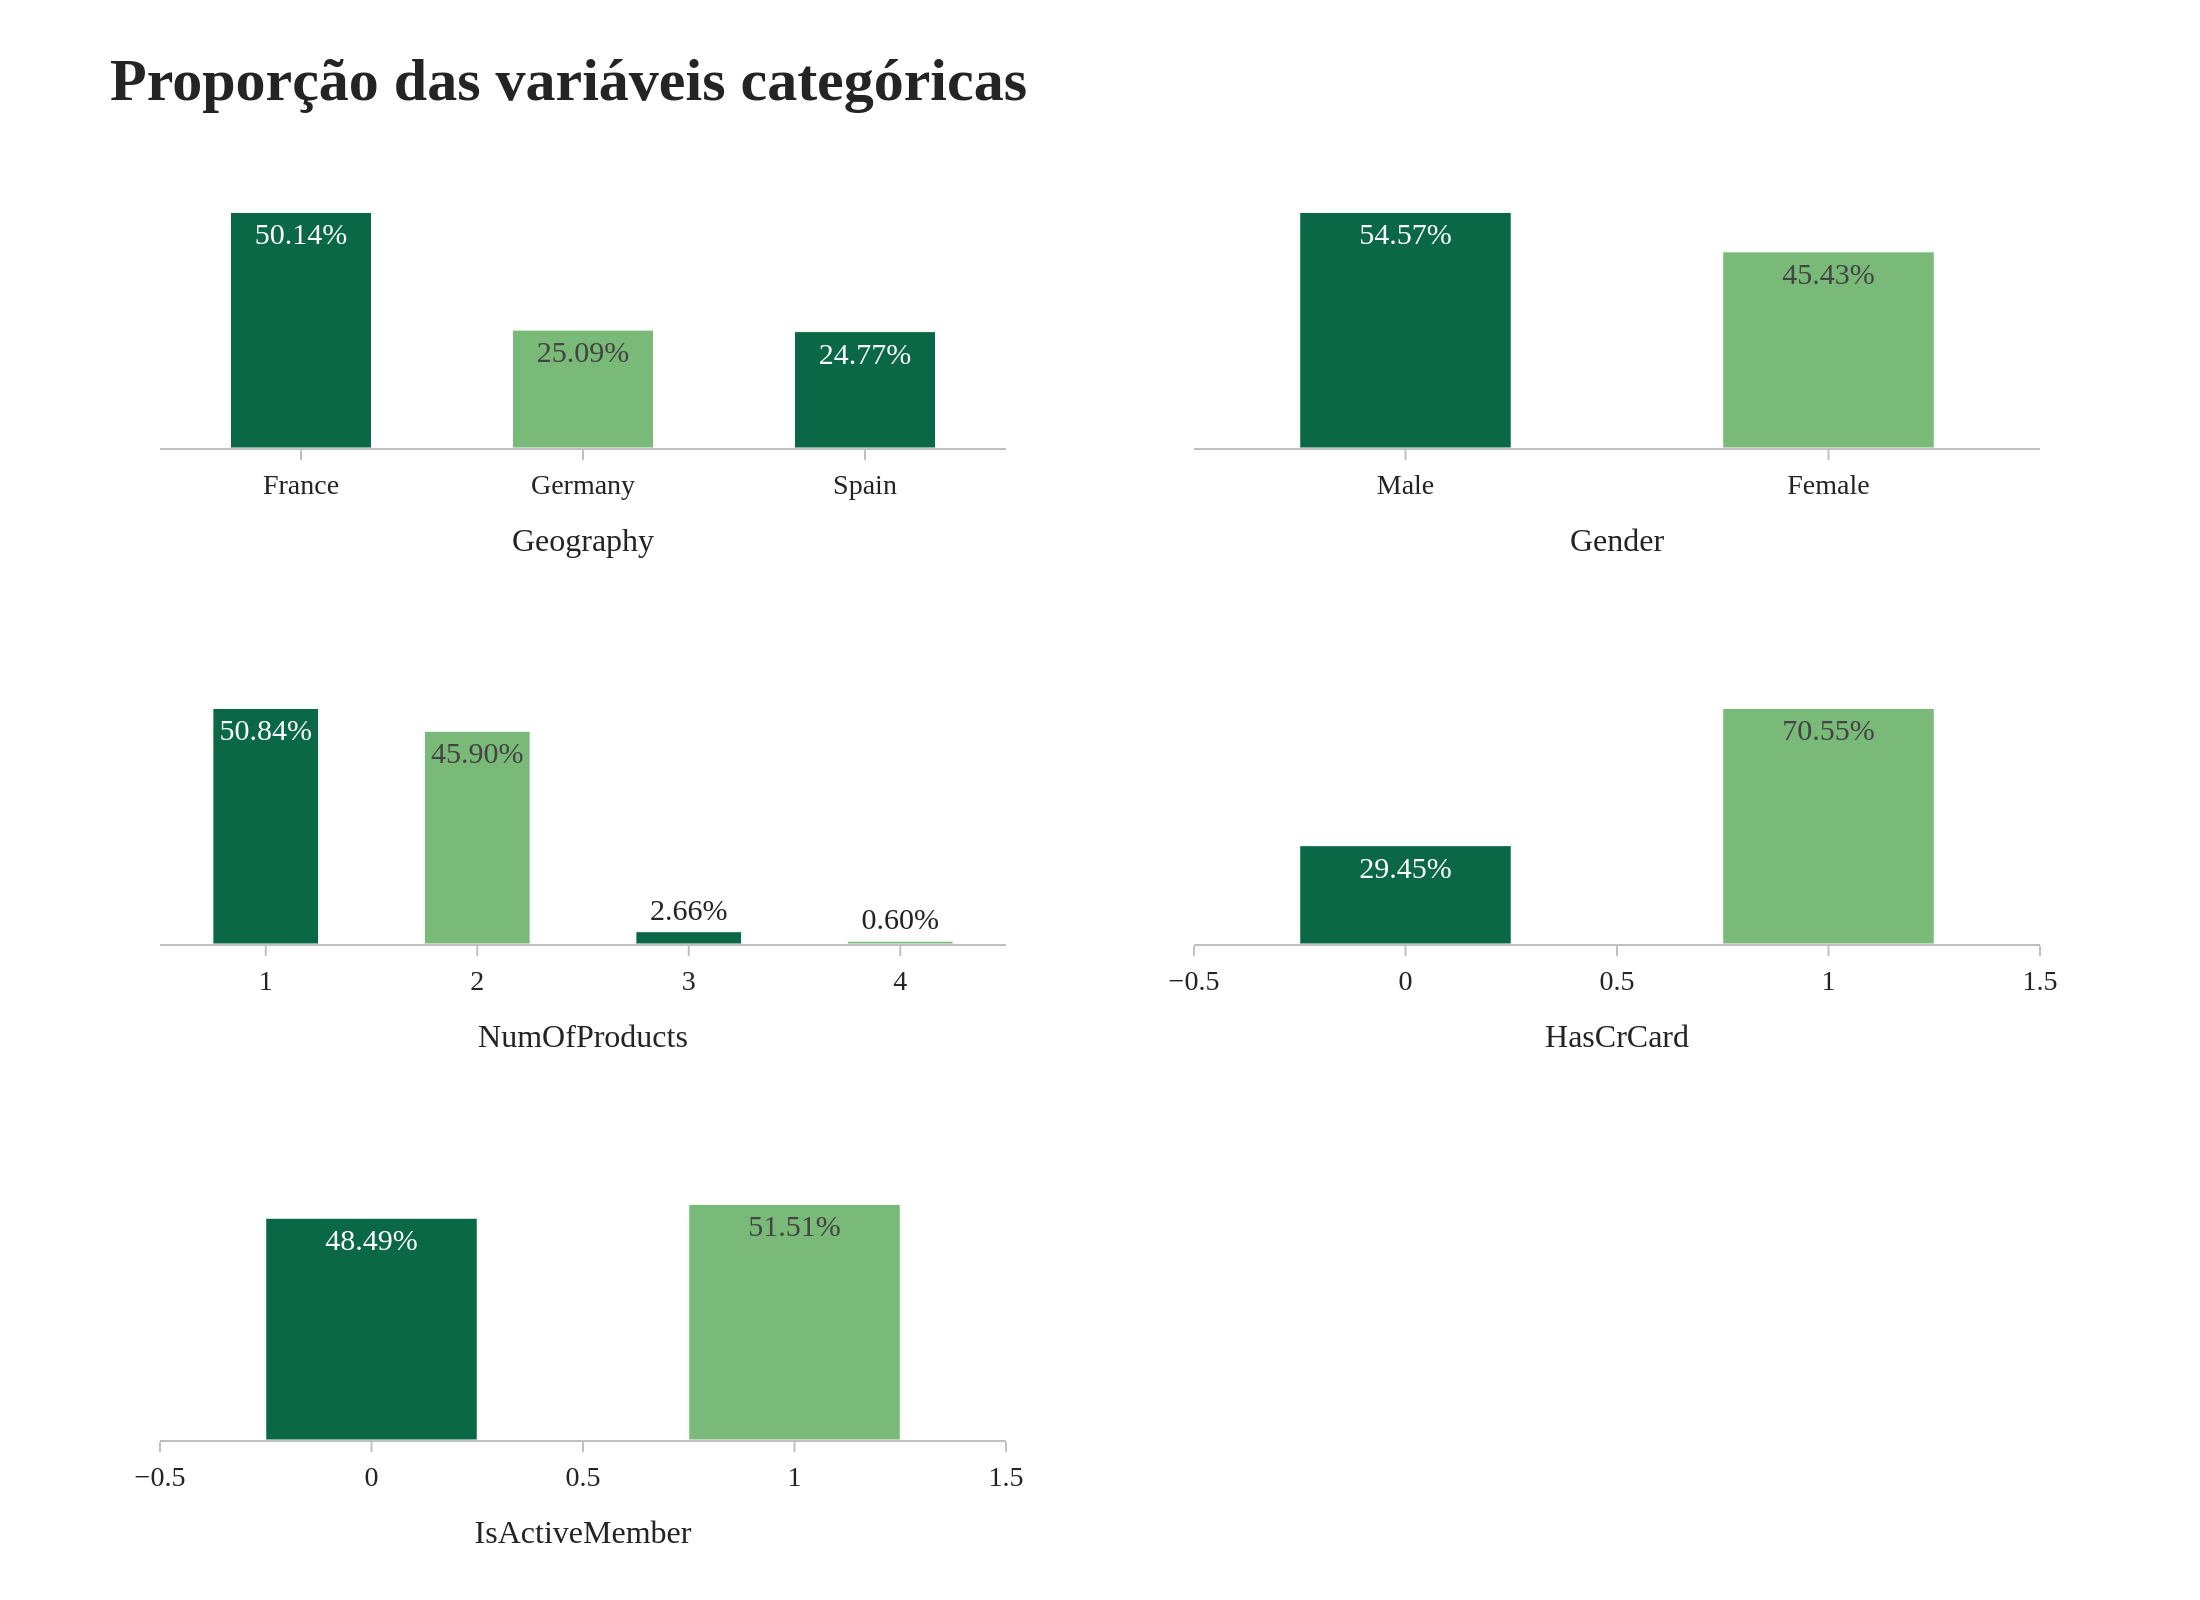

In [64]:
# separando a variavles surname das categoricas para fazer o plot
categorical_variables_without_surname = categorical_variables.drop('Surname',axis=1)

fig  = make_subplots(rows=3,cols=2,vertical_spacing=0.2)
rows = [1,1,2,2,3]
cols= [1,2,1,2,1]

# função que plota um gráfico de barras para cada variável categórica para verificar o total de observações.
def bar_plot_cat_variables(df: pd.DataFrame) -> list[go.Figure]:
    list_colors = ['#0A6847','#7ABA78','#0A6847','#7ABA78']
    list_traces = list()
    i = 0
    for column in df.columns:
        trace = go.Bar(x=df[column].value_counts().index,y=df[column].value_counts().sort_values(ascending=False).values,
                       marker_color=list_colors,width=0.5,
                       text=[f'{num:.2f}%' for num in round(df[column].value_counts(1).sort_values(ascending=False)*100,2)],
                       textfont_size=15)
        list_traces.append(trace)
        i+=1
        if i >=3:
            list_colors = ['#7ABA78','#0A6847']

    return list_traces

traces = bar_plot_cat_variables(categorical_variables_without_surname)
fig.add_traces(traces,rows=rows,cols=cols)
fig.update_layout(title = '<b>Proporção das variáveis categóricas</b>',width=1300,height = 800,showlegend=False,template='simple_white',
                  font_family='RockWell',titlefont_size=30)
i=0
for column in categorical_variables_without_surname.columns:
    fig.update_xaxes(title = dict(text=column,font_size=16),
                    tickcolor='silver',linecolor='silver',tickfont_size=14,row=rows[i],col=cols[i])
    i+=1
fig.update_yaxes(tickcolor='silver',linecolor='silver',showline=False,showticklabels=False,ticks='')
fig.show('png',scale=2, width=1100)

Algumas observações:
- A maioria dos clientes do banco são franceses, correspondendo a 50,14 % do total dos clientes. O restante dos clientes são espanhóis e alemãos com praticamente a mesma quantidade.
- Há 54,57% de homens e 45,43% de mulheres.
- 70,55% dos clientes possui cartão de crédito.
- Metade dos clientes são ativos e metade não são ativos.
- A maioria das pessoas tem 1 ou 2 produtos.

### Analisando as variáveis numéricas

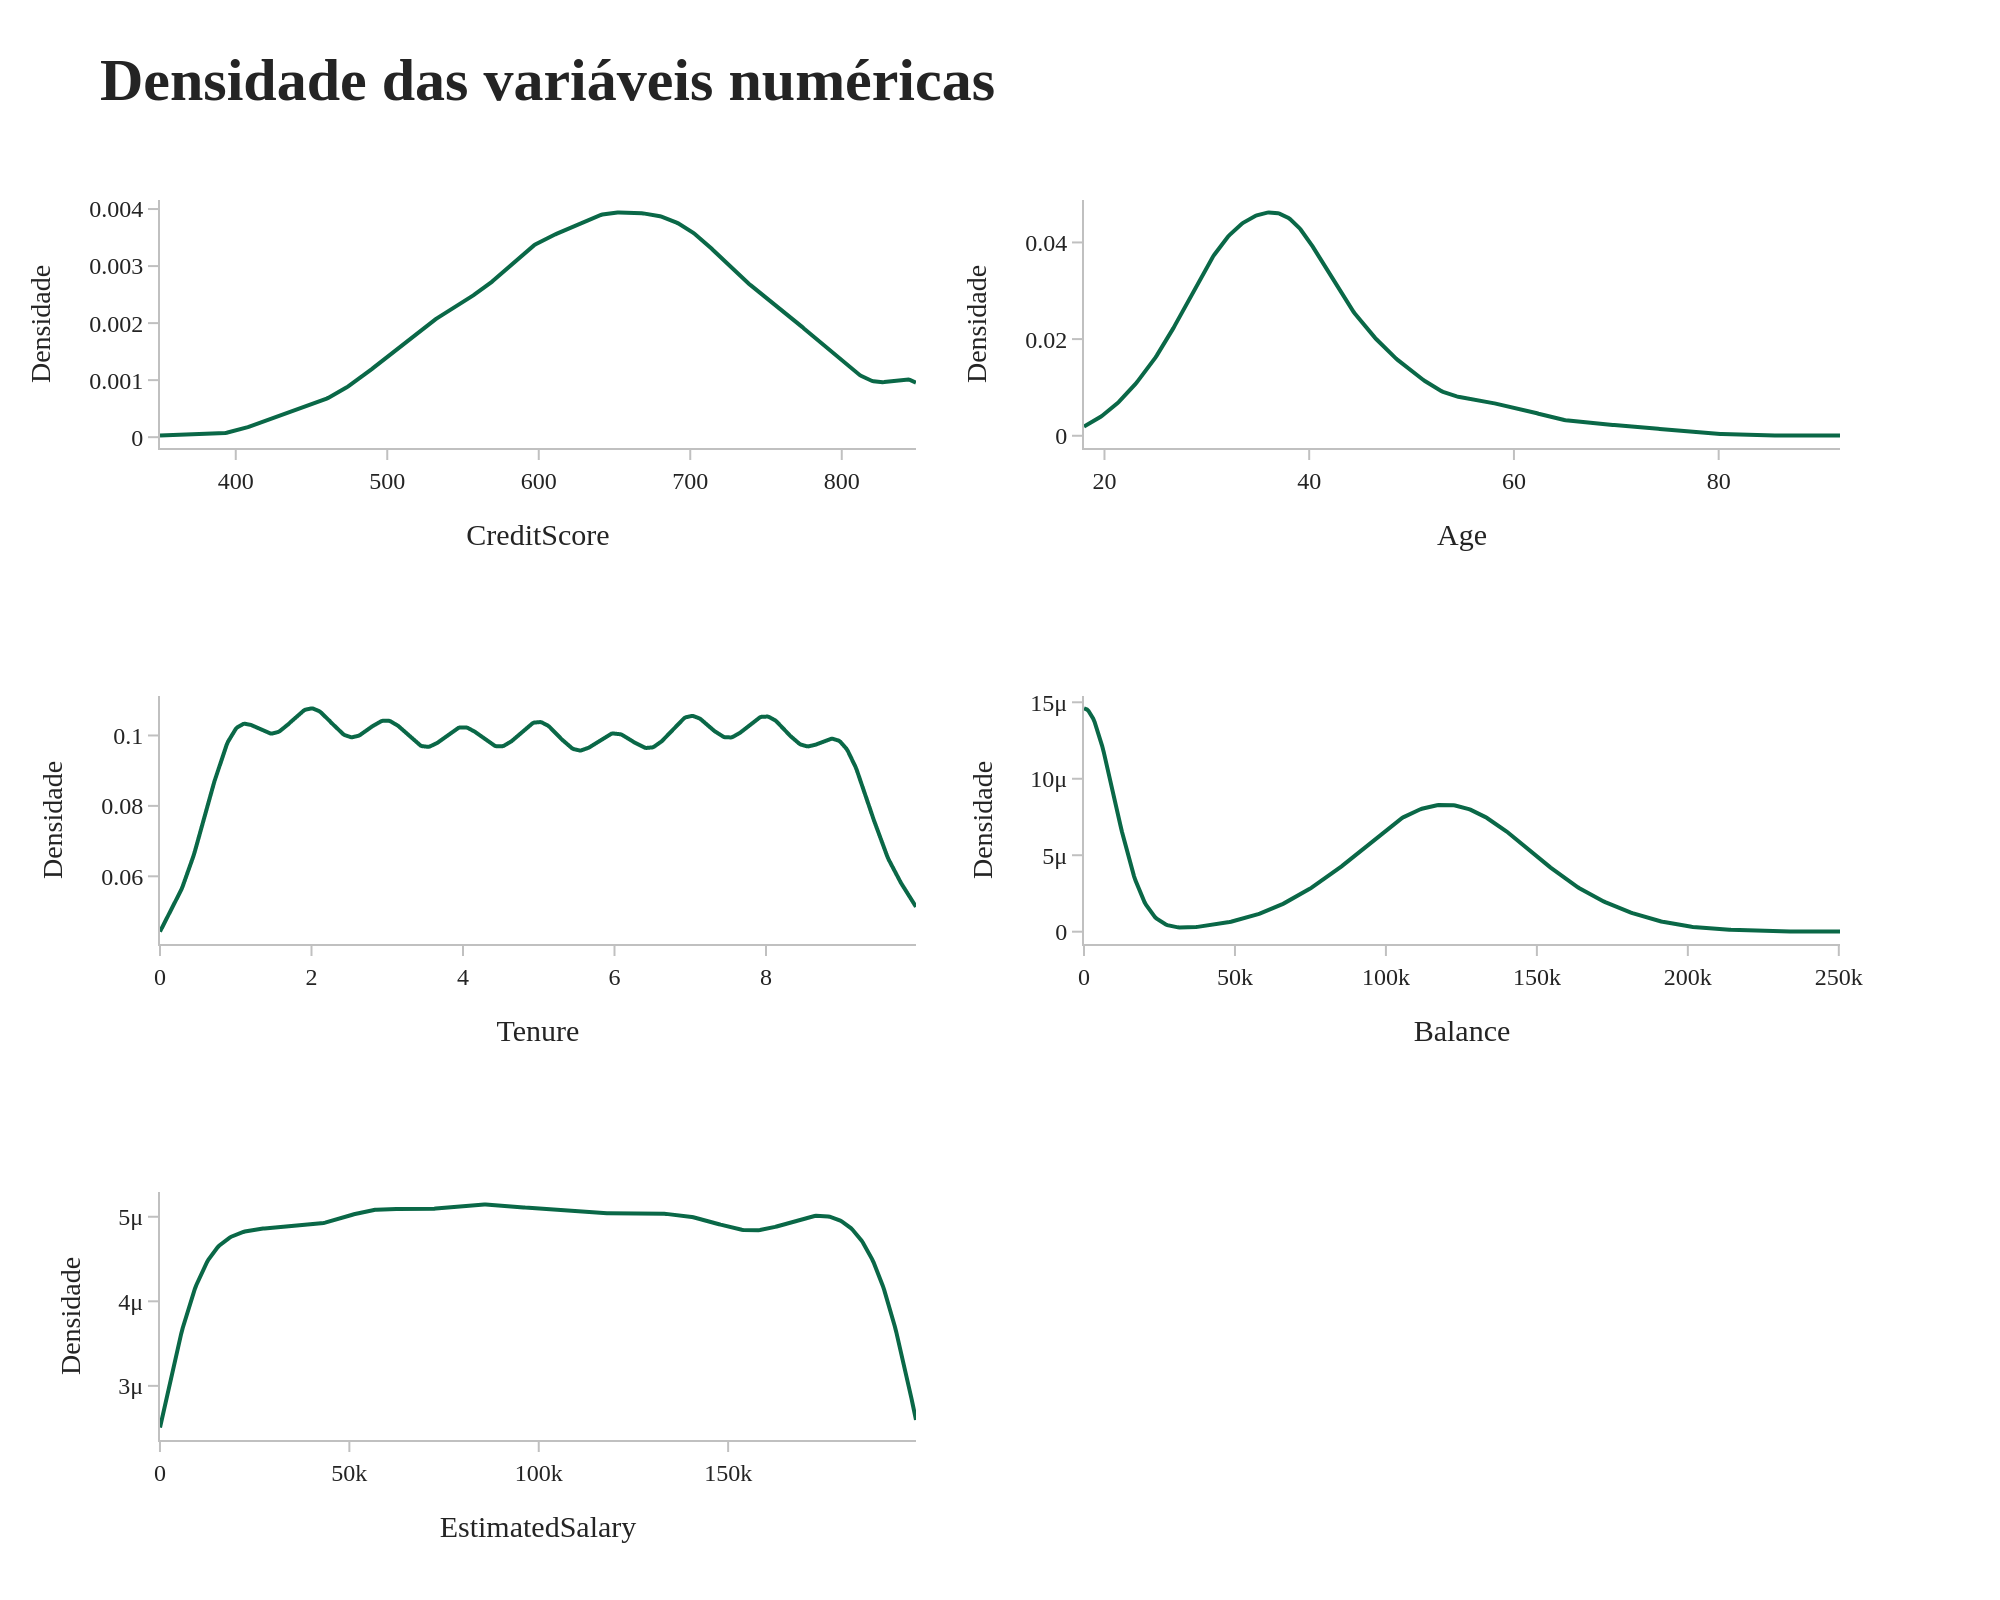

In [65]:
fig2 = make_subplots(rows=3,cols=2,vertical_spacing=0.2)
rows = [1,1,2,2,3]
cols= [1,2,1,2,1]

# função que plot um gráfico de kde para as variáveis numéricas afim de visualizar as distribuições
def kde_plot_num_variables(df: pd.DataFrame) -> list[go.Figure]:
    list_traces = list()
    for column in df.columns:
        trace = ff.create_distplot([df[column]],group_labels=[column],show_rug=False,colors=['#0A6847'])
        list_traces.append(trace.data[1])

    return list_traces

traces = kde_plot_num_variables(numerical_variables)
fig2.add_traces(traces,rows=rows,cols=cols)
fig2.update_layout(title = '<b>Densidade das variáveis numéricas</b>',width=1300,height =800,showlegend=False,template='simple_white',
                    font_family='RockWell',titlefont_size=30)
fig2.update_yaxes(title_text = 'Densidade',tickcolor='silver',linecolor='silver')

i=0
for column in numerical_variables.columns:
    fig2.update_xaxes(title_text = column,tickcolor='silver',linecolor='silver',row=rows[i],col=cols[i],title_font_size=15)
    i+=1
fig2.show('png',scale=2, width=1000)

- A maior concentração de idade está entre 30 e 45 anos.
- A maioria dos clientes tem pontuação no cartão de crédito entre 600 e 700.

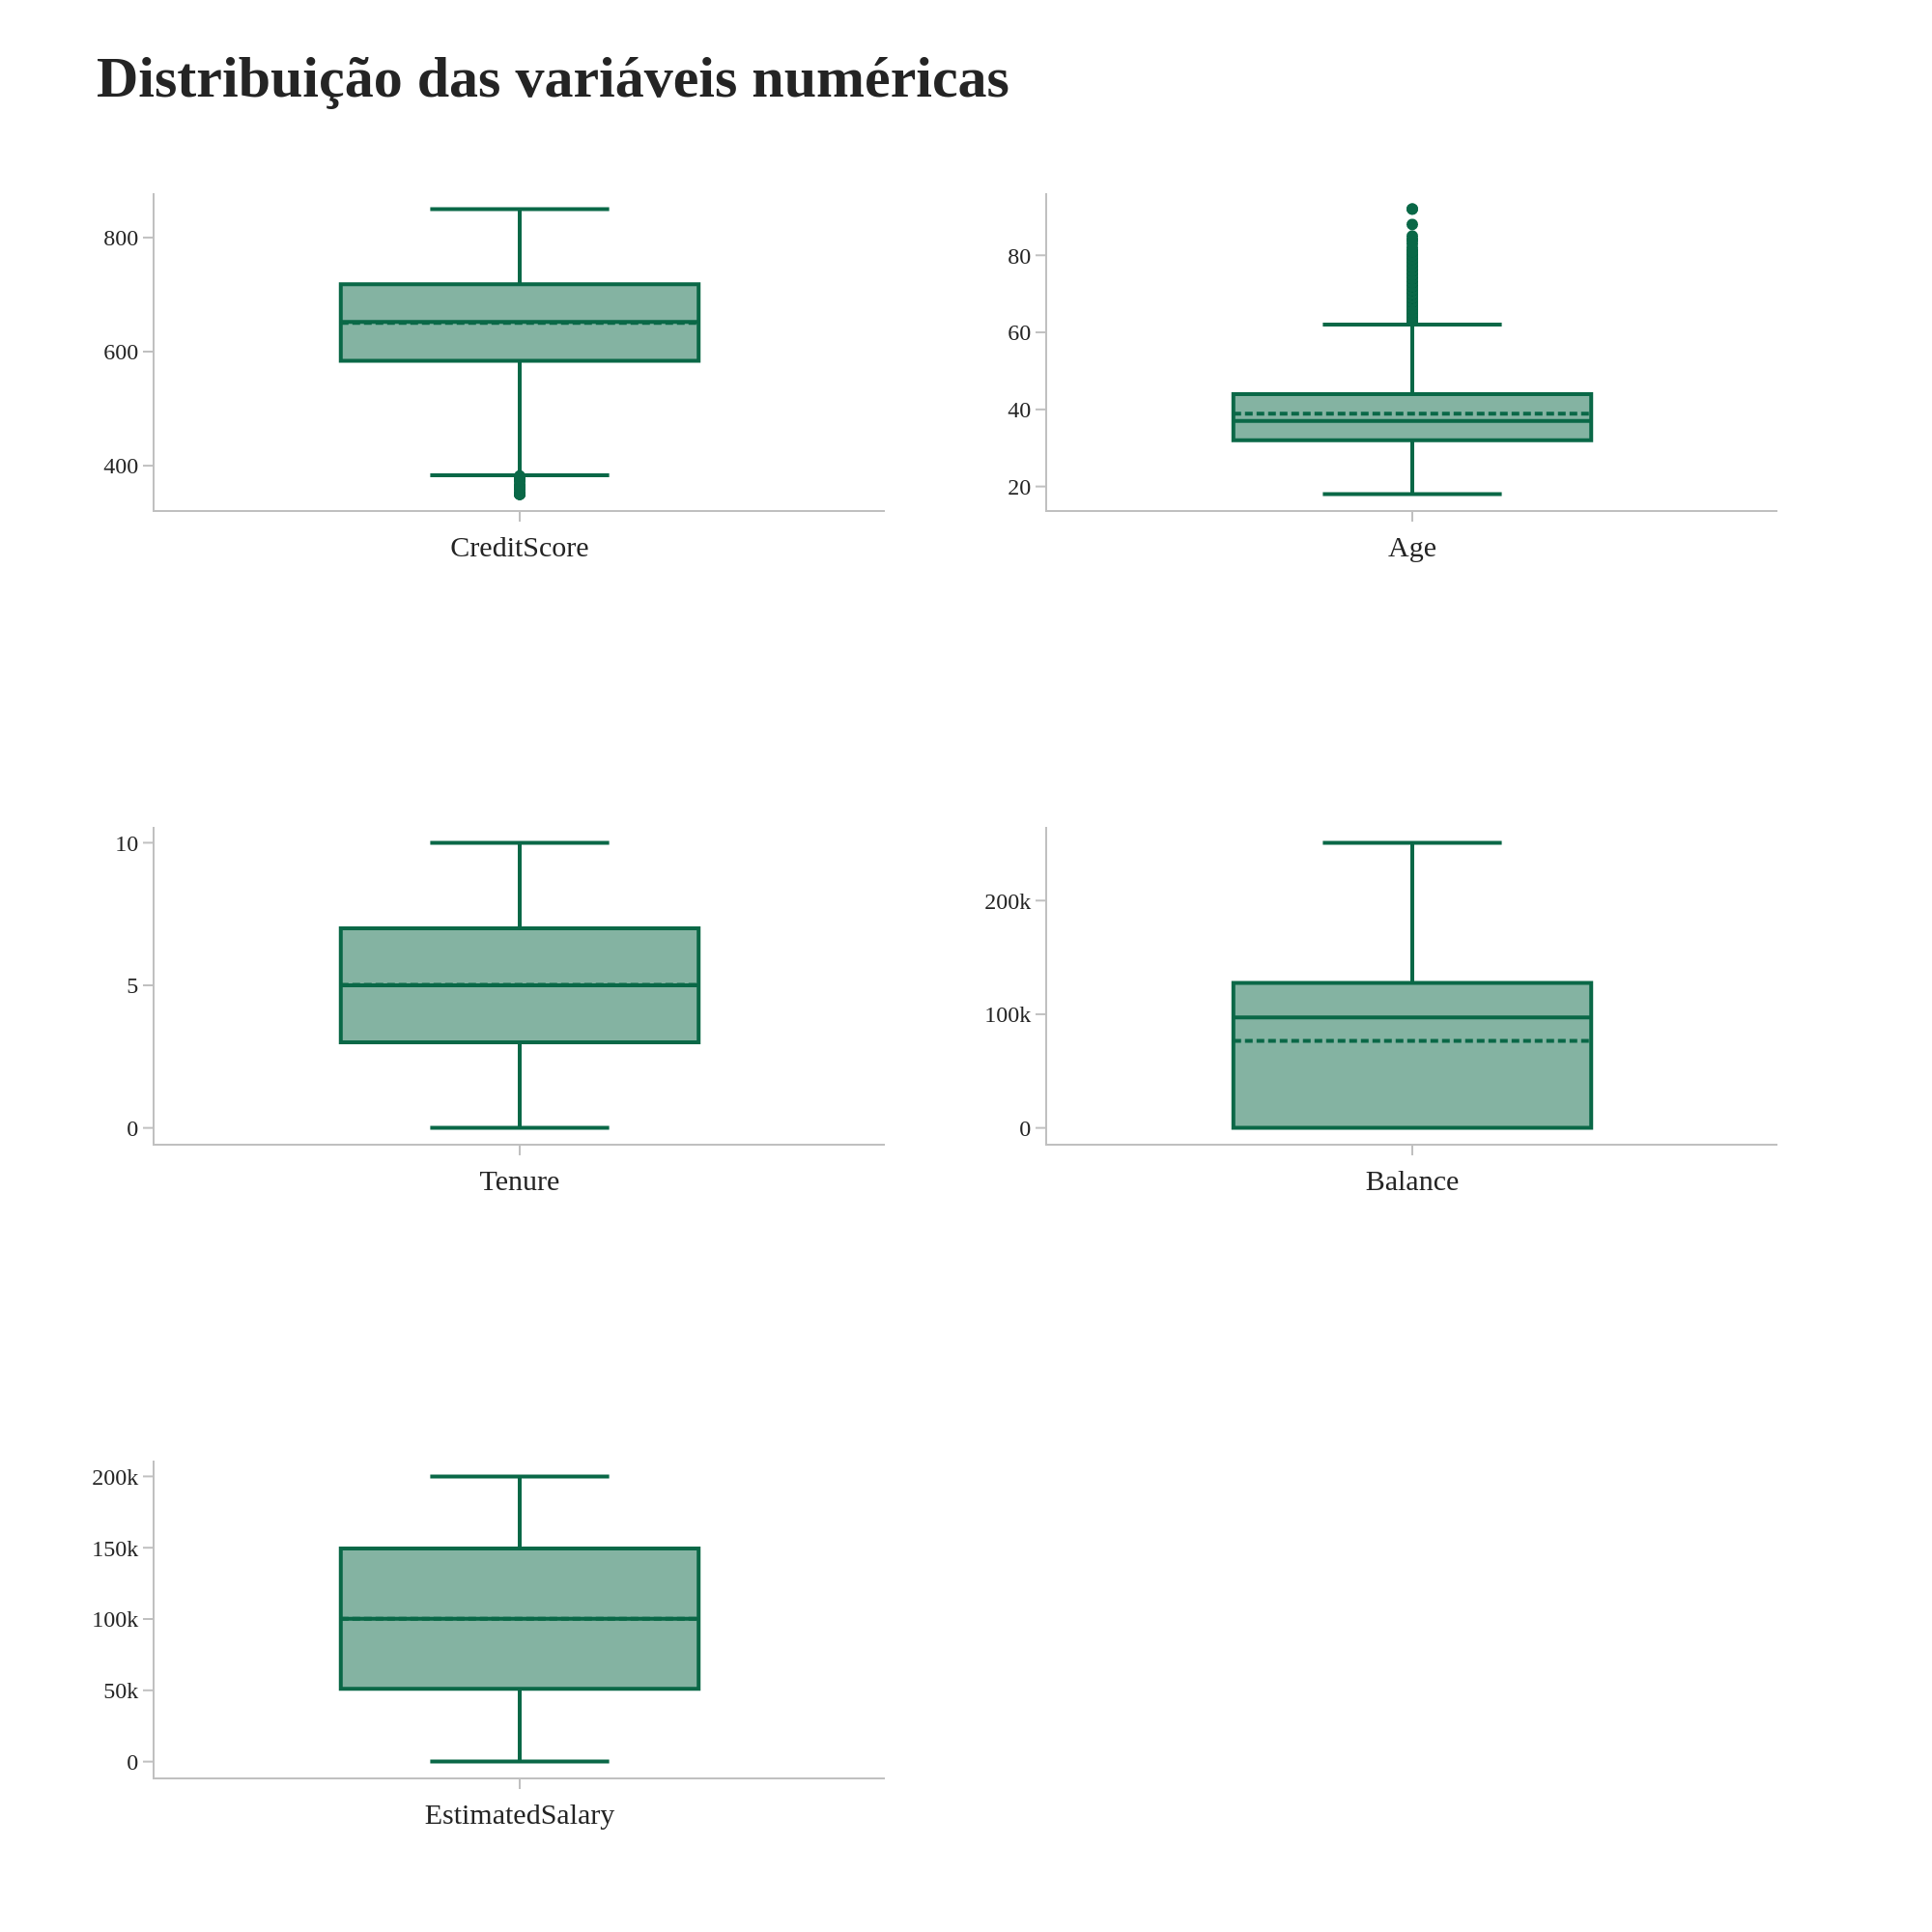

In [66]:
fig3 = make_subplots(rows=3,cols=2,vertical_spacing=0.2)
rows = [1,1,2,2,3]
cols= [1,2,1,2,1]

# função que plot um gráfico de kde para as variáveis numéricas afim de visualizar as distribuições
def box_plot_num_variables(df: pd.DataFrame) -> list[go.Figure]:
    list_traces = list()
    for column in df.columns:
        trace = go.Box(y=df[column],marker_color='#0A6847',name=column,boxmean=True)
        list_traces.append(trace)

    return list_traces

traces = box_plot_num_variables(numerical_variables)
fig3.add_traces(traces,rows=rows,cols=cols)
fig3.update_layout(title = '<b>Distribuição das variáveis numéricas</b>',width=1300,height = 1000,showlegend=False,template='simple_white',
                    font_family='RockWell',titlefont_size=30)
fig3.update_yaxes(tickcolor='silver',linecolor='silver')
fig3.update_xaxes(tickcolor='silver',linecolor='silver',tickfont_size=15)

fig3.show('png',scale=2, width=1000)

Algumas observações:
- CreditScore e Age possui outliers, vamos ter que verificar a porcentagem desses outliers.
- Cerca de 50 % de pessoas tem saldo na conta entre 0 e 100k
- A média de permanência no banco é de 5 anos.

In [67]:
# verificando a porcentagem de outliers na variaável Age e CreditScore
mask_age_outliers = numerical_variables['Age']>62
age_outliers = numerical_variables.loc[mask_age_outliers,'Age']
print(f'A porcentagerm de outliers na variável Age é de: {round((age_outliers.count()/len(numerical_variables))*100,2)}%')

mask_creditscore_outliers = numerical_variables['CreditScore']<383
creditscore_outliers = numerical_variables.loc[mask_creditscore_outliers,'CreditScore']
print(f'A porcentagerm de outliers na variável CreditScore é de: {round((creditscore_outliers.count()/len(numerical_variables))*100,2)}%')

A porcentagerm de outliers na variável Age é de: 3.59%
A porcentagerm de outliers na variável CreditScore é de: 0.15%


- A 359 clientes com idade acima de 62 anos, o que é possível.
- A alguns clientes com menos de 383 de pontução no cartão de crédito, o que indica que essas pessoas não usam muito o cartão.
- Como as situações acima são normais e e a porcentagem de outliers é baixa, não vamos remove-los.

### Analisando a response variable

In [68]:
# proporção da response variable
df_cleaned['Exited'].value_counts(1)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

Como pode ser observado a response variable está desbalanceada. Isso faz com que o modelo tende a classificar não churn com mais facilidade do que casos que foram churn. Para reverter essa situação, será aplicada algumas técnicas na parte da modelagem.

## Análise Multivariada

Nessa etapa, será respondida as seguintes perguntas:

1. Quais fatores demográficos influenciam a saída dos clientes?
    - Clientes de qual faixa etária têm maior probabilidade de sair do banco?
    - O gênero do cliente (masculino/feminino) tem impacto significativo na taxa de saída?
    - A localização geográfica (país/região) influencia a taxa de saída dos clientes?

2. Como o comportamento financeiro afeta a retenção de clientes?
    - Clientes com quais pontuações de crédito têm maior probabilidade de sair do banco?
    - Existe uma correlação entre o saldo da conta (Balance) e a probabilidade de saída do cliente?
    - Clientes com salários estimados (EstimatedSalary) mais baixos têm maior probabilidade de sair?

3. Qual é o impacto dos produtos bancários na retenção de clientes?
    - Clientes que possuem um número maior de produtos bancários (NumOfProducts) são menos propensos a sair?
    - A posse de cartão de crédito (HasCrCard) está associada a uma menor taxa de saída?
    - Membros ativos (IsActiveMember) têm uma taxa de saída menor do que membros não ativos?

4. Como o tempo de permanência no banco (Tenure) afeta a probabilidade de saída?
    - Clientes que estão no banco há mais tempo têm uma menor probabilidade de sair?
    - Existe uma relação significativa entre o tempo de permanência e a taxa de saída?



### 1. Quais fatores demográficos influenciam a saída dos clientes?
- Clientes de qual faixa etária têm a maior taxa de saída do banco?
- O gênero do cliente (masculino/feminino) tem impacto significativo na taxa de saída?
- A localização geográfica (país/região) influencia a taxa de saída dos clientes?


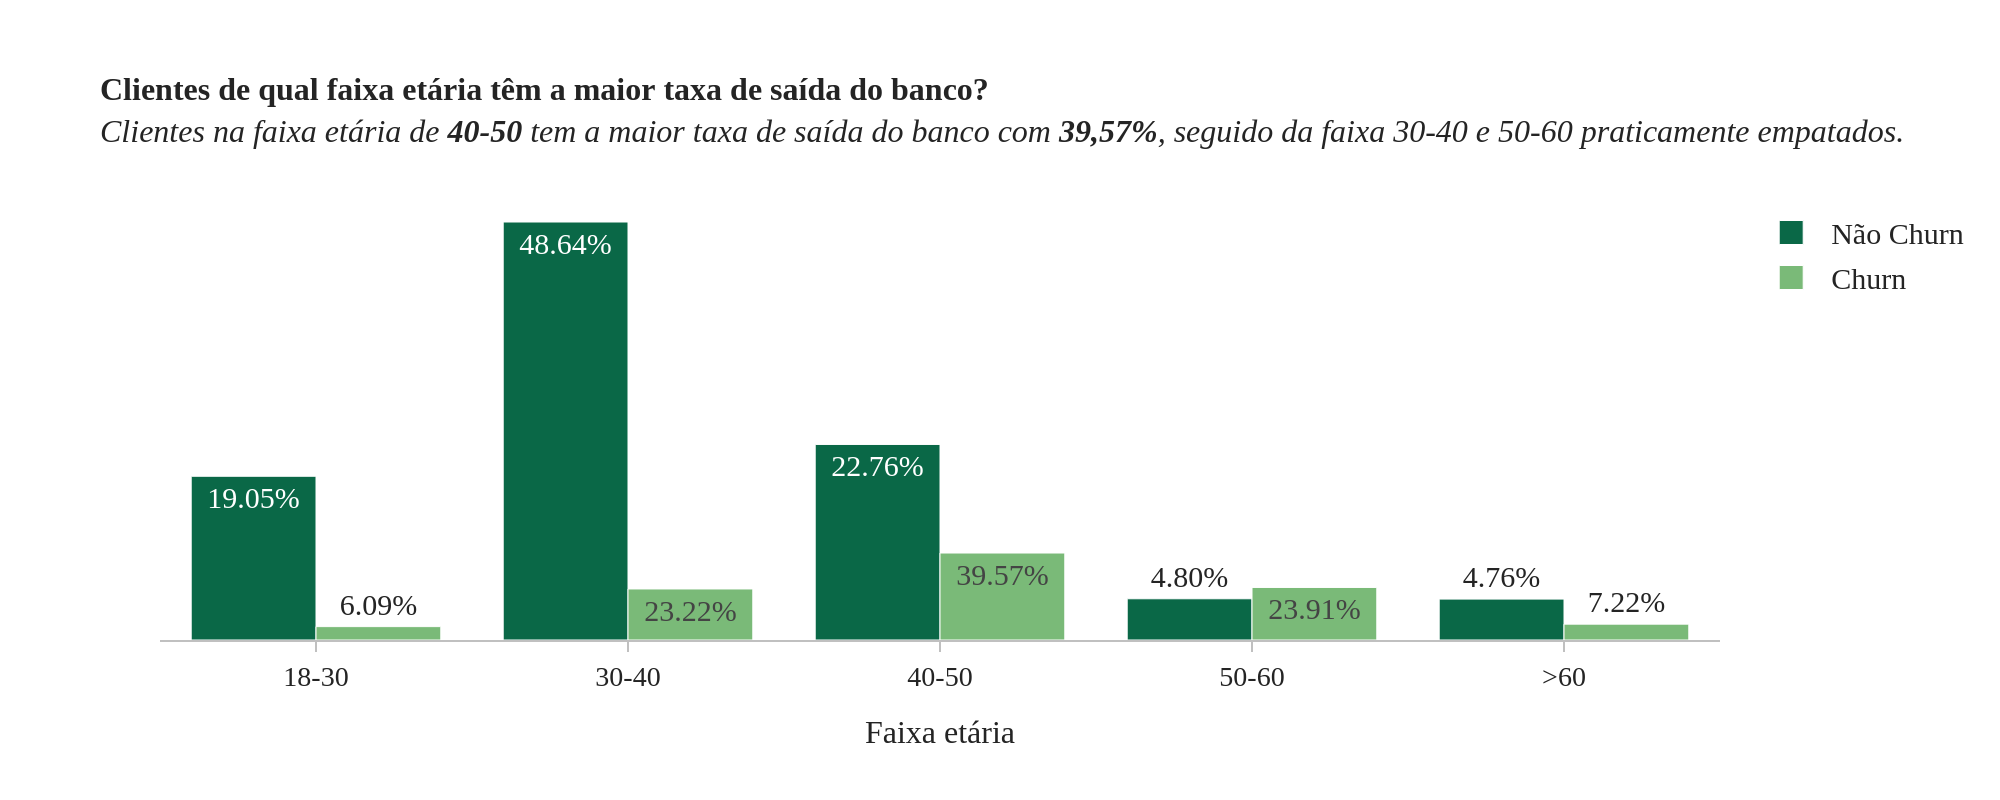

In [69]:
# dataframe contendo as idades
ages_group = numerical_variables['Age'].to_frame()

# agrupando as idades por faixa etária
ages_group['faixa_etaria'] = pd.cut(ages_group['Age'],bins=[18,30,40,50,60,100],labels=['18-30','30-40','40-50','50-60','>60'],right=False)
response_variable = df_cleaned['Exited']

# juntando as idades com a response variable
ages_group_with_response_variable = ages_group.copy()
ages_group_with_response_variable['response_variable'] = response_variable
#ages_group_with_response_variable = ages_group_with_response_variable.sort_values(by='faixa_etaria')


fig4 = go.Figure()
fig4.add_trace(go.Bar(x=ages_group_with_response_variable.groupby('response_variable')['faixa_etaria'].value_counts()[0].index.sort_values(),
                     y=ages_group_with_response_variable.groupby('response_variable')['faixa_etaria'].value_counts()[0].sort_index(),
                     marker_color='#0A6847',
                     text=[f'{num:.2f}%' for num in round(ages_group_with_response_variable.groupby('response_variable') \
                                                           ['faixa_etaria'].value_counts(1)[0].sort_index()*100,2)],
                                                           textfont_size=15,name='Não Churn'))
fig4.add_trace(go.Bar(x=ages_group_with_response_variable.groupby('response_variable')['faixa_etaria'].value_counts()[1].index.sort_values(),
                     y=ages_group_with_response_variable.groupby('response_variable')['faixa_etaria'].value_counts()[1].sort_index(),
                     marker_color='#7ABA78',
                     text=[f'{num:.2f}%' for num in round(ages_group_with_response_variable.groupby('response_variable') \
                                                           ['faixa_etaria'].value_counts(1)[1].sort_index()*100,2)],
                                                           textfont_size=15,name='Churn'))
title = '<b>Clientes de qual faixa etária têm a maior taxa de saída do banco?</b><br>' \
        '<i>Clientes na faixa etária de <b>40-50</b> tem a maior taxa de saída do banco com <b>39,57%</b>, ' \
        'seguido da faixa 30-40 e 50-60 praticamente empatados.</i>'
fig4.update_layout(title = dict(text=title,font_size=16),
                   width=1000,height =400,showlegend=True,template='simple_white',font_family='RockWell',legend_font_size=15)
fig4.update_yaxes(tickcolor='silver',linecolor='silver',showline=False,showticklabels=False,ticks='')
fig4.update_xaxes(title = dict(text='Faixa etária',font_size=16),
                  tickcolor='silver',linecolor='silver',tickfont_size=14)
fig4.show('png',scale=2, width=1000)

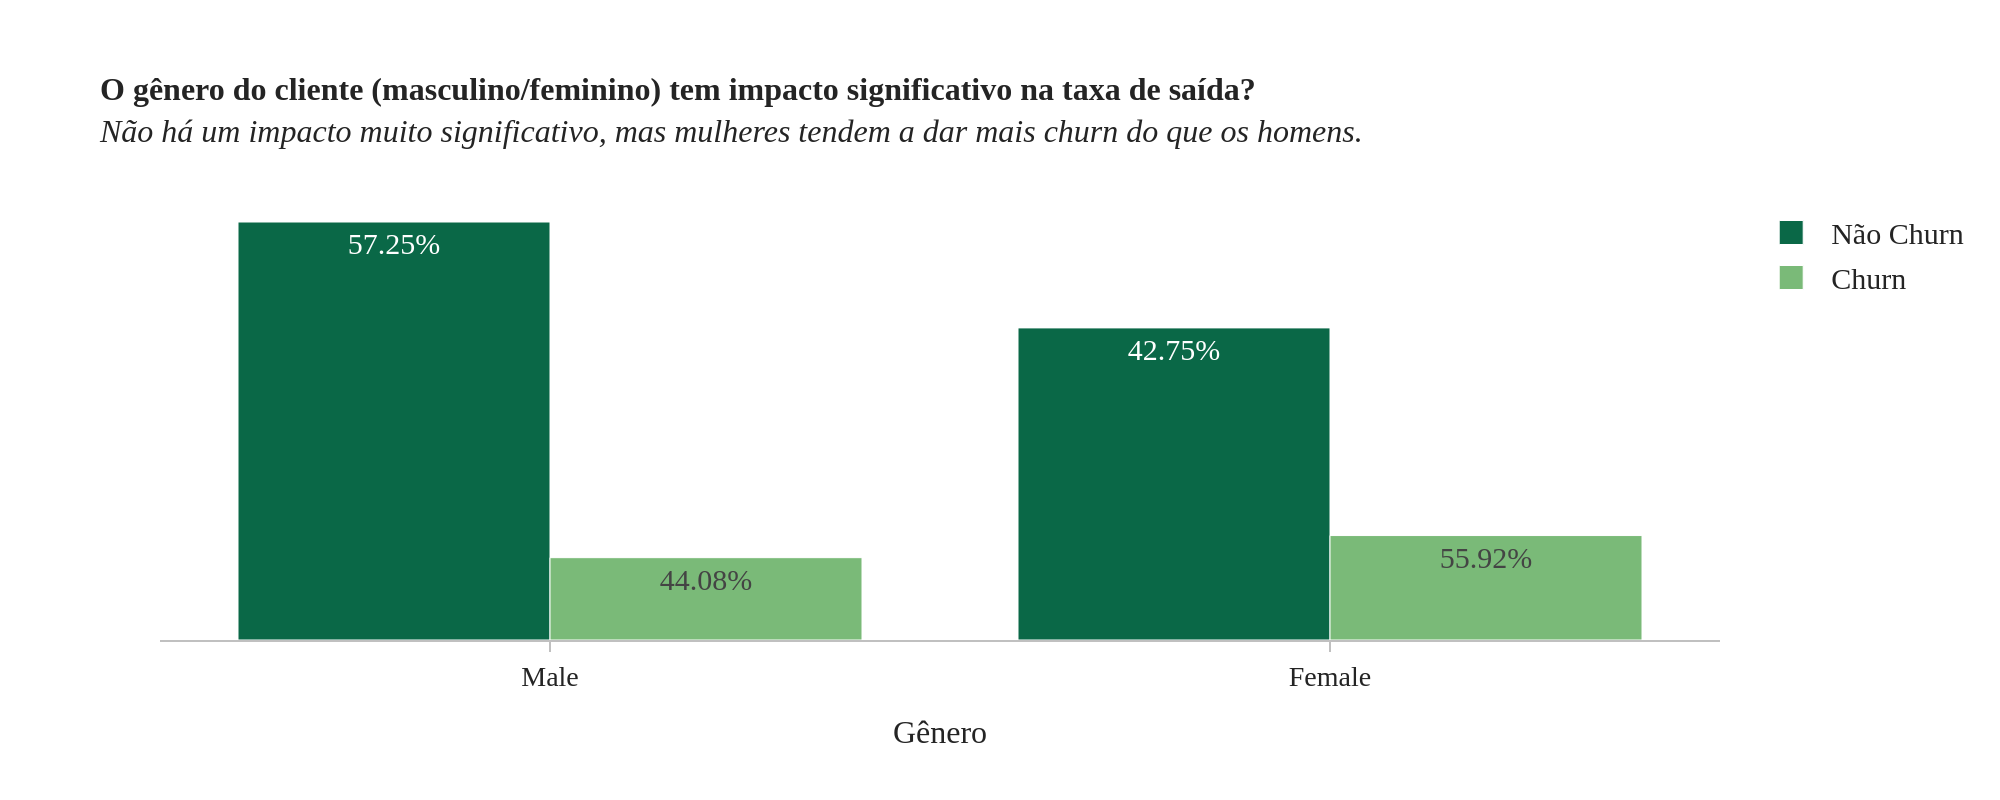

In [70]:
# dataframe contendo os gêneros
genres = categorical_variables['Gender'].to_frame()

# juntando os gêneros com a response variable
genres_with_response_variable = genres.copy()
genres_with_response_variable['response_variable'] = response_variable

fig5 = go.Figure()
fig5.add_trace(go.Bar(x=genres_with_response_variable.groupby('response_variable')['Gender'].value_counts()[0].index,
                      y=genres_with_response_variable.groupby('response_variable')['Gender'].value_counts()[0],marker_color='#0A6847',
                      name='Não Churn',text=[f'{num:.2f}%' for num in round(genres_with_response_variable.groupby('response_variable') \
                                                           ['Gender'].value_counts(1)[0]*100,2)],textfont_size=15))
fig5.add_trace(go.Bar(x=genres_with_response_variable.groupby('response_variable')['Gender'].value_counts()[1].index,
                      y=genres_with_response_variable.groupby('response_variable')['Gender'].value_counts()[1],marker_color='#7ABA78',
                      name='Churn',text=[f'{num:.2f}%' for num in round(genres_with_response_variable.groupby('response_variable') \
                                                           ['Gender'].value_counts(1)[1]*100,2)],textfont_size=15))
title = '<b>O gênero do cliente (masculino/feminino) tem impacto significativo na taxa de saída?</b><br>' \
        '<i>Não há um impacto muito significativo, mas mulheres tendem a dar mais churn do que os homens.</i>'
fig5.update_layout(title = dict(text=title,font_size=16),
                   width=1000,height =400,showlegend=True,template='simple_white',font_family='RockWell',legend_font_size=15)
fig5.update_yaxes(tickcolor='silver',linecolor='silver',showline=False,showticklabels=False,ticks='')
fig5.update_xaxes(title = dict(text='Gênero',font_size=16),
                  tickcolor='silver',linecolor='silver',tickfont_size=14)
fig5.show('png',scale=2, width=1000)

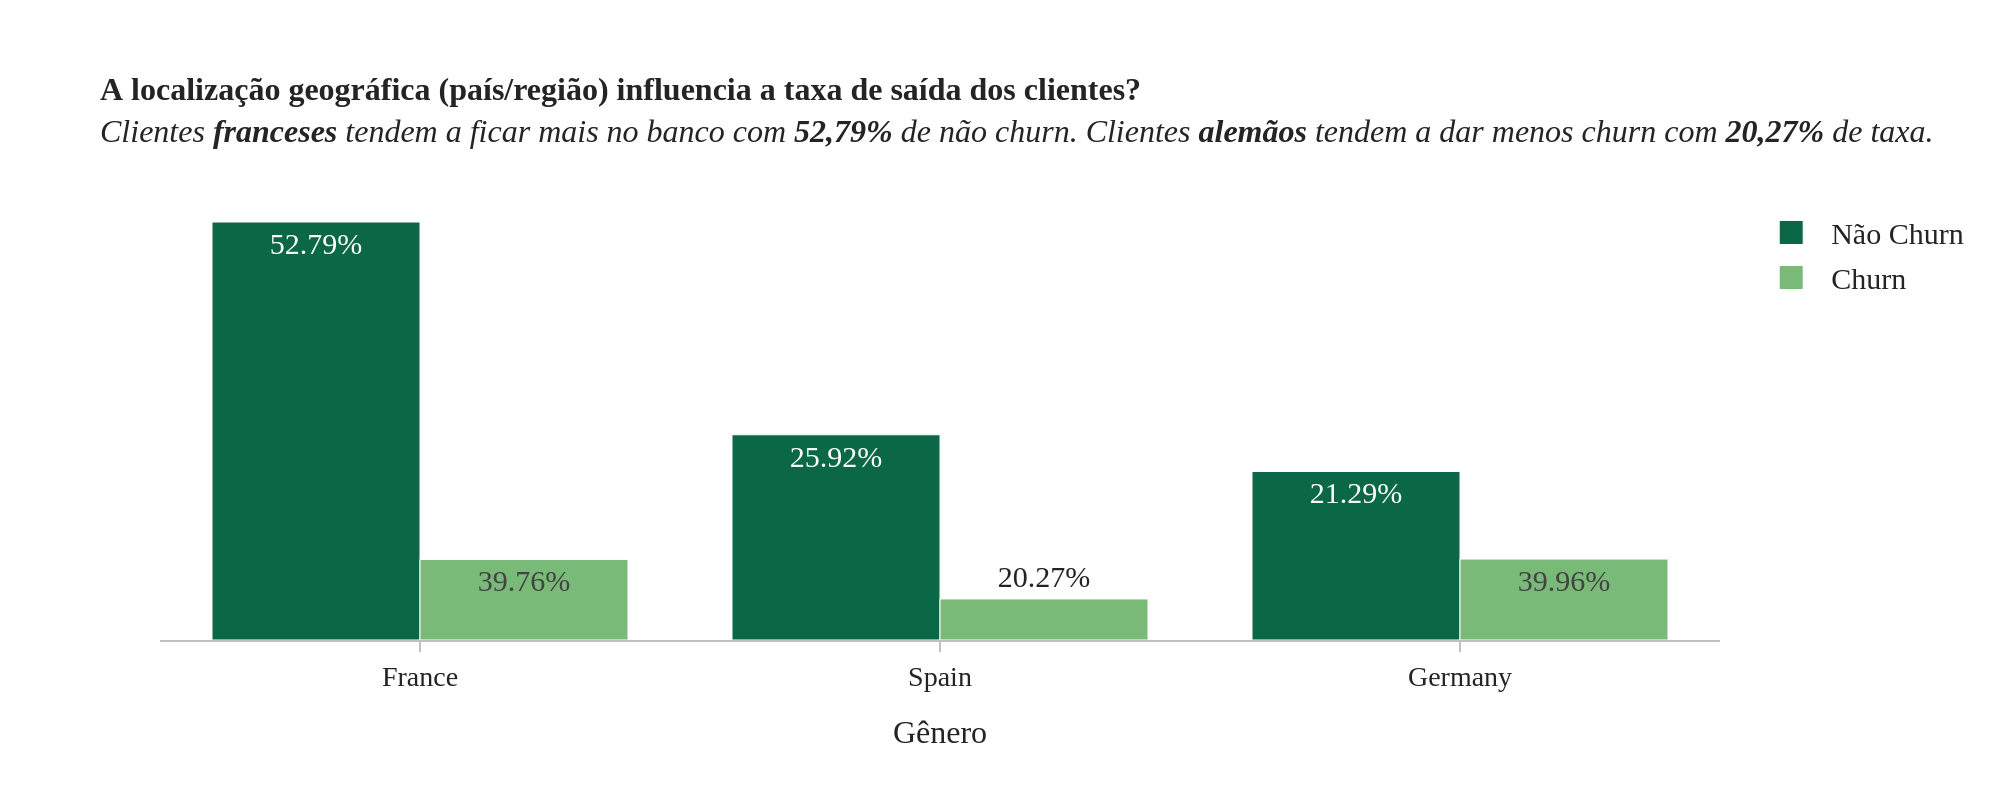

In [71]:
# dataframe contendo os países
countrys = categorical_variables['Geography'].to_frame()

# juntando os países com a response variable
countrys_with_response_variable = countrys.copy()
countrys_with_response_variable['response_variable'] = response_variable

fig6 = go.Figure()
fig6.add_trace(go.Bar(x=countrys_with_response_variable.groupby('response_variable')['Geography'].value_counts()[0].index,
                      y=countrys_with_response_variable.groupby('response_variable')['Geography'].value_counts()[0],marker_color='#0A6847',
                      name='Não Churn',text=[f'{num:.2f}%' for num in round(countrys_with_response_variable.groupby('response_variable') \
                                                           ['Geography'].value_counts(1)[0]*100,2)],textfont_size=15))
fig6.add_trace(go.Bar(x=countrys_with_response_variable.groupby('response_variable')['Geography'].value_counts()[1].index,
                      y=countrys_with_response_variable.groupby('response_variable')['Geography'].value_counts()[1],marker_color='#7ABA78',
                      name='Churn',text=[f'{num:.2f}%' for num in round(countrys_with_response_variable.groupby('response_variable') \
                                                           ['Geography'].value_counts(1)[1]*100,2)],textfont_size=15))
title = '<b>A localização geográfica (país/região) influencia a taxa de saída dos clientes?</b><br>' \
        '<i>Clientes <b>franceses</b> tendem a ficar mais no banco com <b>52,79%</b> de não churn. ' \
                'Clientes <b>alemãos</b> tendem a dar menos churn com <b>20,27%</b> de taxa.</i>'
fig6.update_layout(title = dict(text=title,font_size=16),
                   width=1000,height =400,showlegend=True,template='simple_white',font_family='RockWell',legend_font_size=15)
fig6.update_yaxes(tickcolor='silver',linecolor='silver',showline=False,showticklabels=False,ticks='')
fig6.update_xaxes(title = dict(text='Gênero',font_size=16),
                  tickcolor='silver',linecolor='silver',tickfont_size=14)
fig6.show('png',scale=2, width=1000)

### 2. Como o comportamento financeiro afeta a retenção de clientes?
- Clientes com quais pontuações de crédito têm maior probabilidade de sair do banco?
- Existe uma correlação entre o saldo da conta (Balance) e a probabilidade de saída do cliente?
- Clientes com salários estimados (EstimatedSalary) mais baixos têm maior probabilidade de sair?

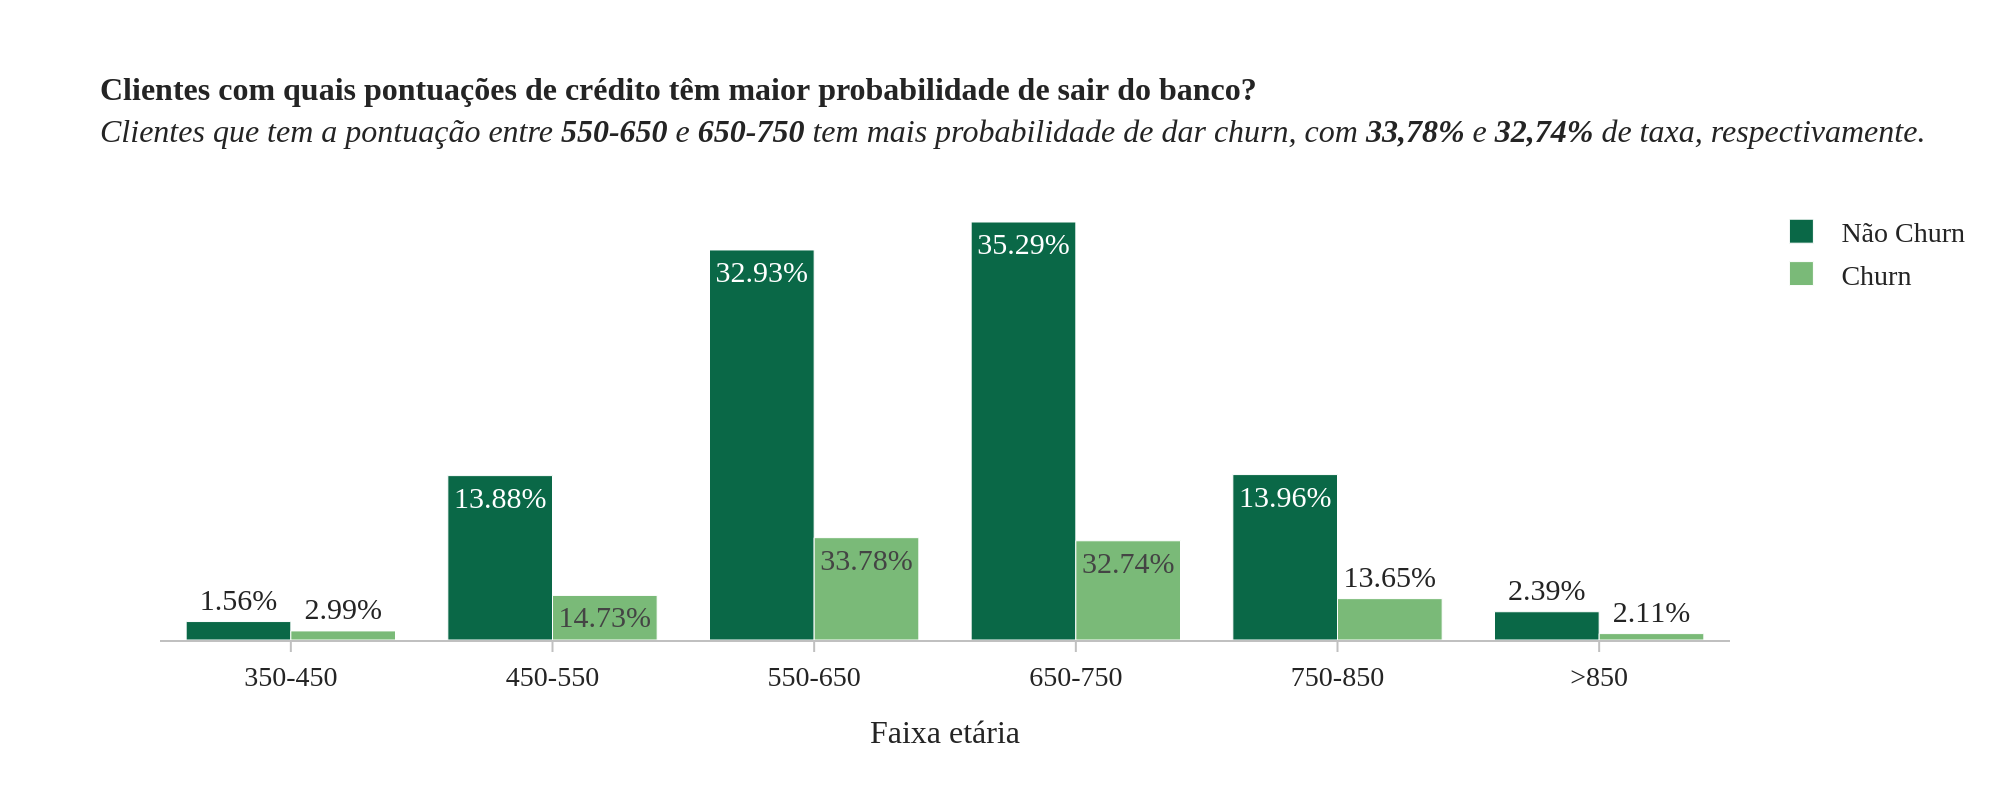

In [72]:
# dataframe contendo os pontos do cartão de crédito
credit_scores = numerical_variables['CreditScore'].to_frame()

# agrupando os pontos do cartão de crédito por faixa
credit_scores['faixa_credit_score'] = pd.cut(credit_scores['CreditScore'],bins=[350,450,550,650,750,850,1000],
                                             labels=['350-450','450-550','550-650','650-750','750-850','>850'],right=False)


# juntando os pontos do cartão de crédito com a response variable
credit_scores_with_response_variable = credit_scores.copy()
credit_scores_with_response_variable['response_variable'] = response_variable


fig7 = go.Figure()
fig7.add_trace(go.Bar(x=credit_scores_with_response_variable.groupby('response_variable')['faixa_credit_score'].value_counts()[0].index.sort_values(),
                     y=credit_scores_with_response_variable.groupby('response_variable')['faixa_credit_score'].value_counts()[0].sort_index(),
                     marker_color='#0A6847',name='Não Churn',
                     text=[f'{num:.2f}%' for num in round(credit_scores_with_response_variable.groupby('response_variable') \
                                                           ['faixa_credit_score'].value_counts(1)[0].sort_index()*100,2)],textfont_size=15))
fig7.add_trace(go.Bar(x=credit_scores_with_response_variable.groupby('response_variable')['faixa_credit_score'].value_counts()[1].index.sort_values(),
                     y=credit_scores_with_response_variable.groupby('response_variable')['faixa_credit_score'].value_counts()[1].sort_index(),
                     marker_color='#7ABA78',name='Churn',
                     text=[f'{num:.2f}%' for num in round(credit_scores_with_response_variable.groupby('response_variable') \
                                                           ['faixa_credit_score'].value_counts(1)[1].sort_index()*100,2)],textfont_size=15))
title = '<b>Clientes com quais pontuações de crédito têm maior probabilidade de sair do banco?</b><br>' \
        '<i>Clientes que tem a pontuação entre <b>550-650</b> e <b>650-750</b> tem mais probabilidade de dar churn, ' \
        'com <b>33,78%</b> e <b>32,74%</b> de taxa, respectivamente.</i>'
fig7.update_layout(title = dict(text=title,font_size=16),
                   width=1000,height =400,showlegend=True,template='simple_white',font_family='RockWell',legend_font_size=14)
fig7.update_yaxes(tickcolor='silver',linecolor='silver',showline=False,showticklabels=False,ticks='')
fig7.update_xaxes(title = dict(text='Faixa etária',font_size=16),
                  tickcolor='silver',linecolor='silver',tickfont_size=14)
fig7.show('png',scale=2, width=1000)

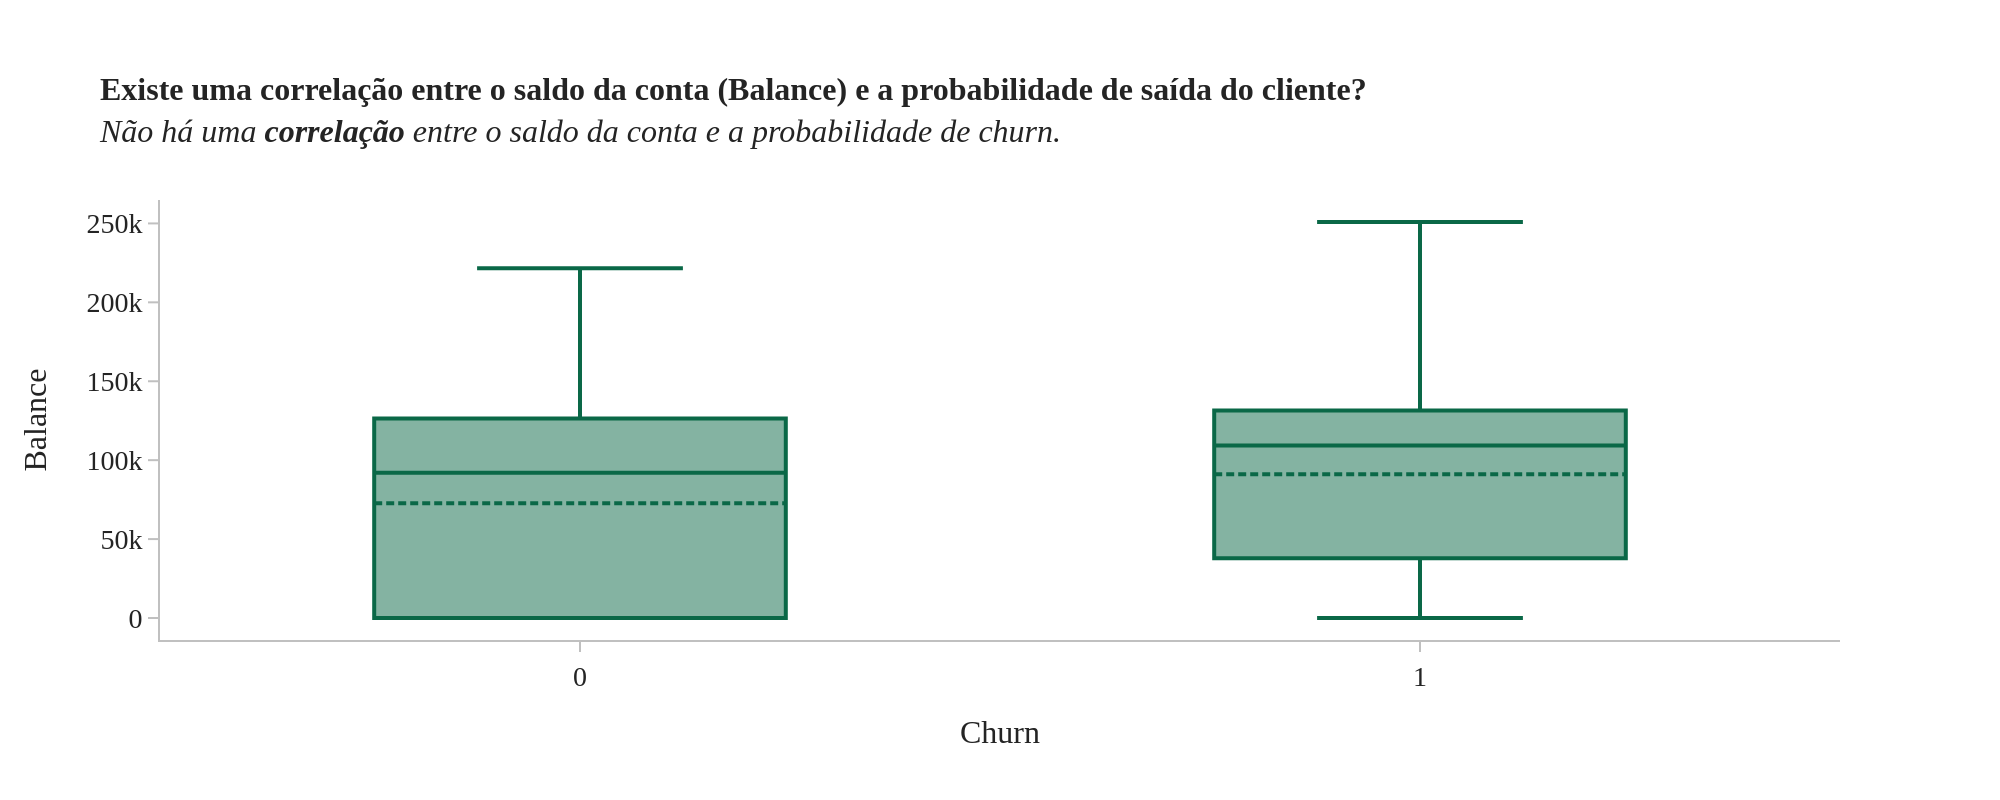

In [73]:
# dataframe contendo o saldo da conta dos clientes
balance = numerical_variables['Balance'].to_frame()


# juntando o saldo da conta dos clientes cm a response variable
balance_with_response_variable = balance.copy()
balance_with_response_variable['response_variable'] = response_variable

fig8 = go.Figure()
fig8.add_trace(go.Box(x=balance_with_response_variable['response_variable'],y=balance_with_response_variable['Balance'],
                      marker_color='#0A6847',boxmean=True))
title = '<b>Existe uma correlação entre o saldo da conta (Balance) e a probabilidade de saída do cliente?</b><br>' \
        '<i>Não há uma <b>correlação</b> entre o saldo da conta e a probabilidade de churn. </i>'
fig8.update_layout(title = dict(text=title,font_size=16),
                   width=1000,height =400,showlegend=False,template='simple_white',font_family='RockWell',legend_font_size=14)
fig8.update_yaxes(title = dict(text='Balance',font_size=16),tickcolor='silver',linecolor='silver',tickfont_size=14)
fig8.update_xaxes(title = dict(text='Churn',font_size=16),
                  tickcolor='silver',linecolor='silver',tickfont_size=14)
fig8.show('png',scale=2, width=1000)

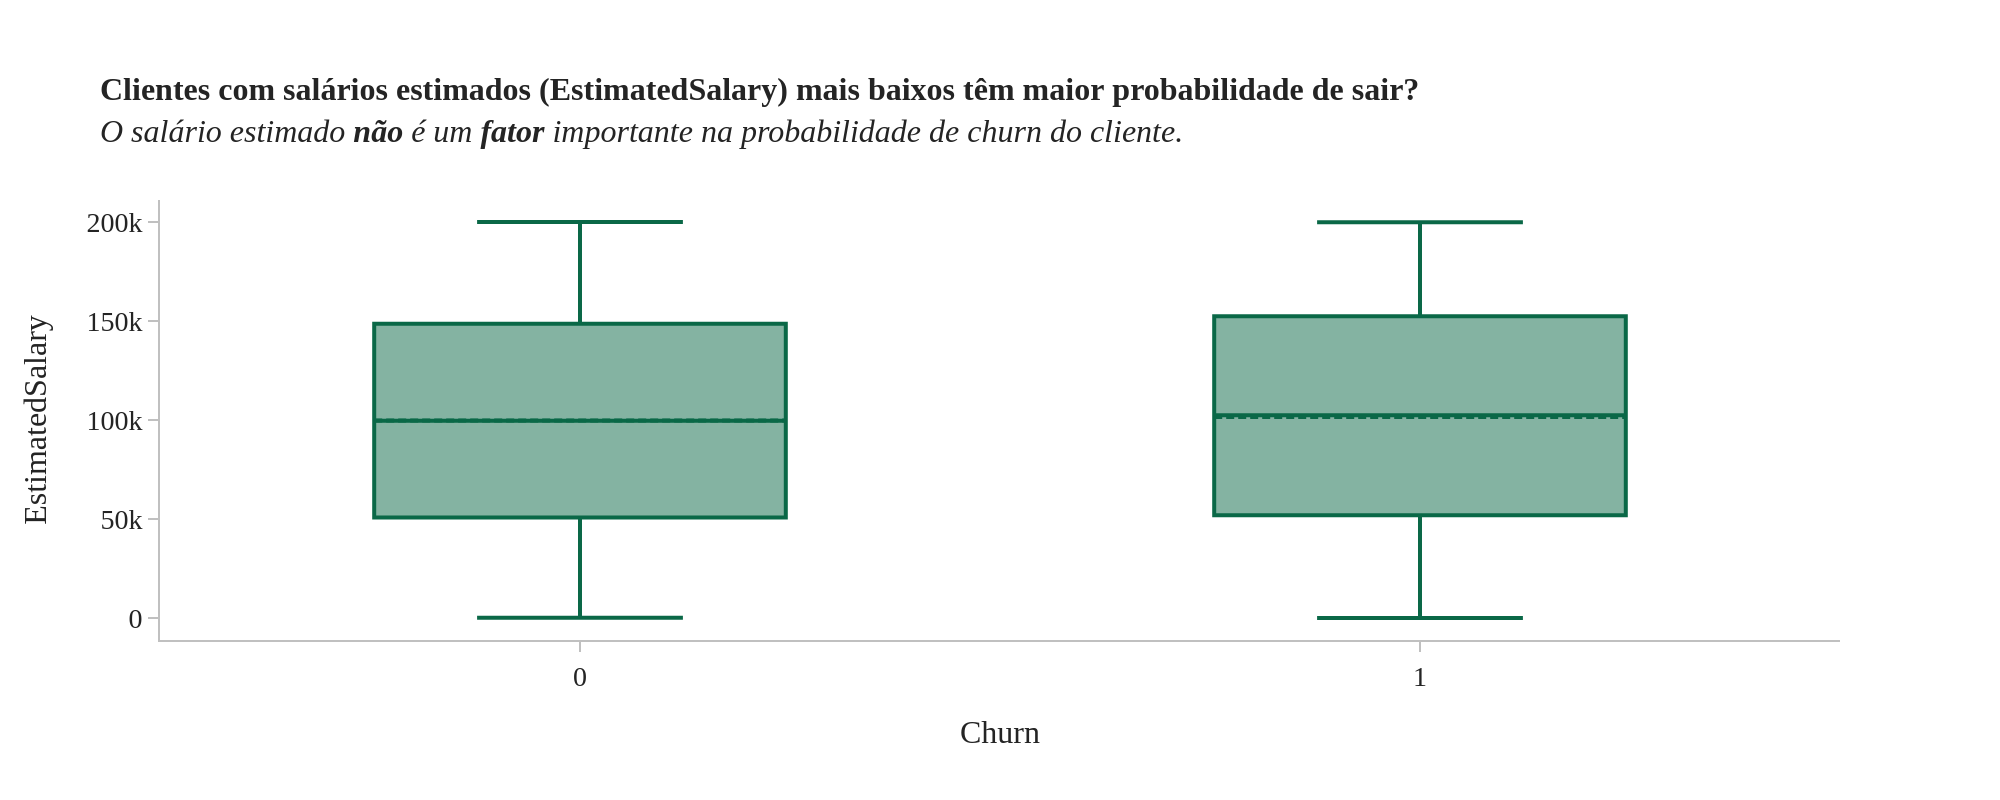

In [74]:
# dataframe contendo o saldo da conta dos clientes
estimated_salary = numerical_variables['EstimatedSalary'].to_frame()

# juntando o saldo da conta dos clientes cm a response variable
estimated_salary_with_response_variable = estimated_salary.copy()
estimated_salary_with_response_variable['response_variable'] = response_variable

fig9 = go.Figure()
fig9.add_trace(go.Box(x=estimated_salary_with_response_variable['response_variable'],y=estimated_salary_with_response_variable['EstimatedSalary'],
                      marker_color='#0A6847',boxmean=True))
title = '<b>Clientes com salários estimados (EstimatedSalary) mais baixos têm maior probabilidade de sair?</b><br>' \
        '<i>O salário estimado <b>não</b> é um <b>fator</b> importante na probabilidade de churn do cliente.</i>'
fig9.update_layout(title = dict(text=title,font_size=16),
                   width=1000,height =400,showlegend=False,template='simple_white',font_family='RockWell',legend_font_size=14)
fig9.update_yaxes(title = dict(text='EstimatedSalary',font_size=16),tickcolor='silver',linecolor='silver',tickfont_size=14)
fig9.update_xaxes(title = dict(text='Churn',font_size=16),
                  tickcolor='silver',linecolor='silver',tickfont_size=14)
fig9.show('png',scale=2, width=1000)

### 3. Qual é o impacto dos produtos bancários na retenção de clientes?
- Clientes que possuem um número maior de produtos bancários (NumOfProducts) são menos propensos a sair?
- A posse de cartão de crédito (HasCrCard) está associada a uma menor taxa de saída?
- Membros ativos (IsActiveMember) têm uma taxa de saída menor do que membros não ativos?


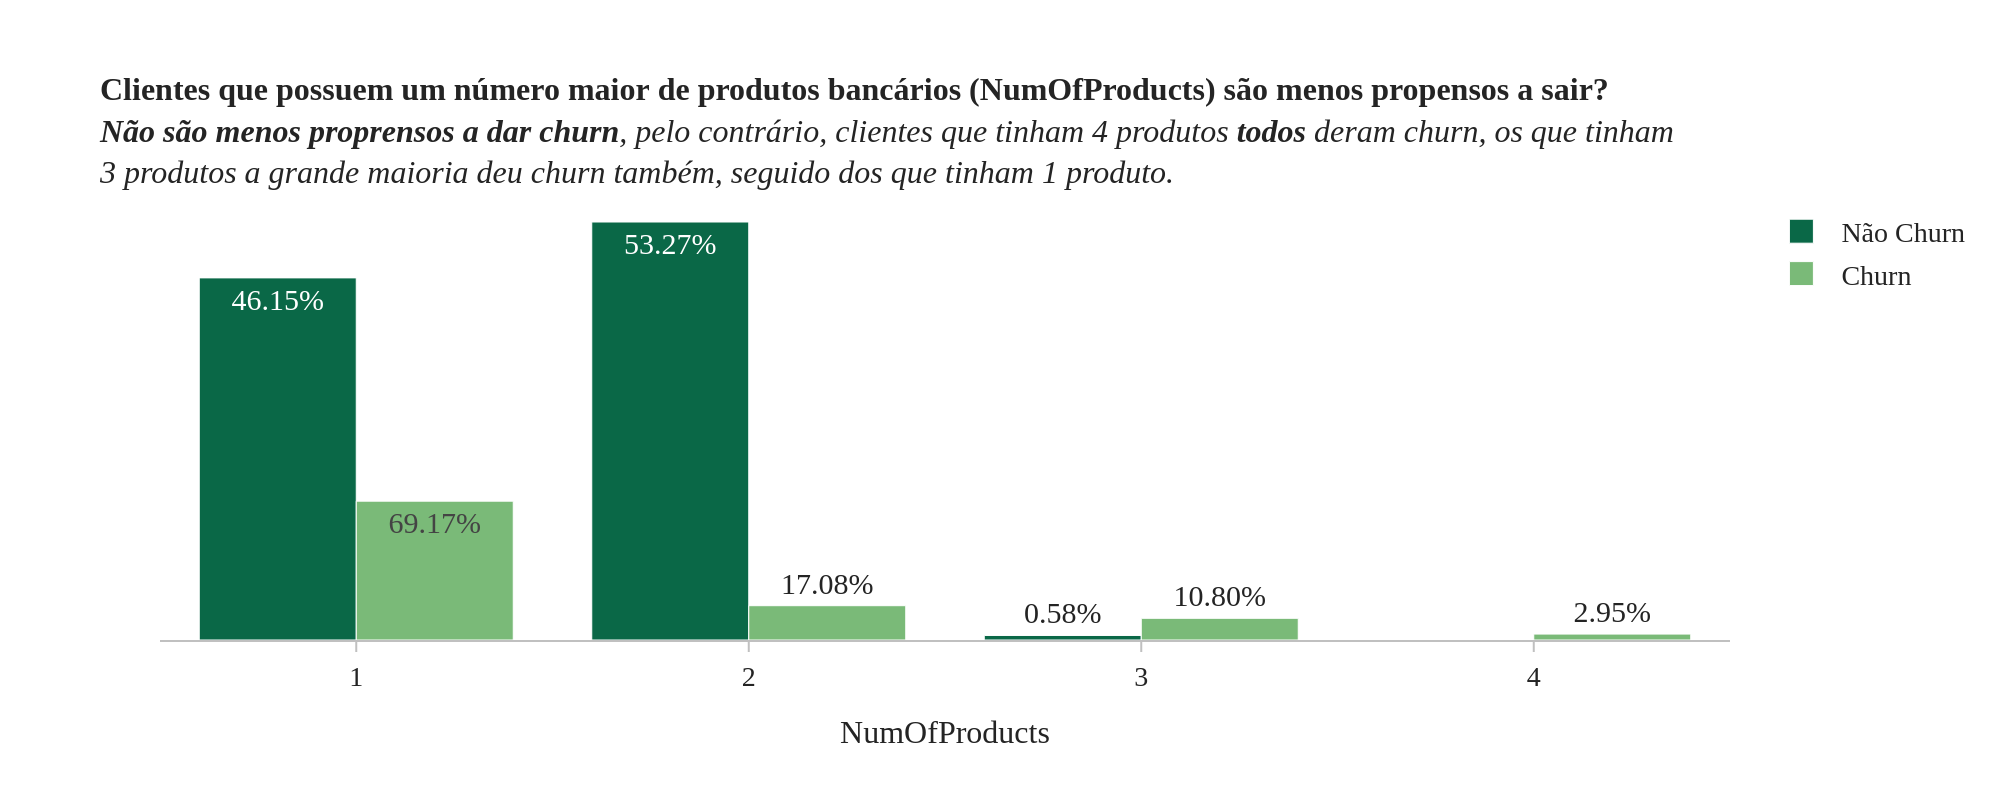

In [75]:
# dataframe contendo o número de produtos
numofproducts = categorical_variables['NumOfProducts'].to_frame()

# juntando o número de produtos com a response variable
numofproducts_with_response_variable = numofproducts.copy()
numofproducts_with_response_variable['response_variable'] = response_variable

fig10 = go.Figure()
fig10.add_trace(go.Bar(x=numofproducts_with_response_variable.groupby('response_variable')['NumOfProducts'].value_counts()[0].index.sort_values(),
                       y=numofproducts_with_response_variable.groupby('response_variable')['NumOfProducts'].value_counts()[0].sort_index(),
                        marker_color='#0A6847',name='Não Churn',
                        text=[f'{num:.2f}%' for num in round(numofproducts_with_response_variable.groupby('response_variable') \
                                                           ['NumOfProducts'].value_counts(1)[0].sort_index()*100,2)],textfont_size=15))
fig10.add_trace(go.Bar(x=numofproducts_with_response_variable.groupby('response_variable')['NumOfProducts'].value_counts()[1].index.sort_values(),
                       y=numofproducts_with_response_variable.groupby('response_variable')['NumOfProducts'].value_counts()[1].sort_index(),
                       marker_color = '#7ABA78',name='Churn',
                       text=[f'{num:.2f}%' for num in round(numofproducts_with_response_variable.groupby('response_variable') \
                                                           ['NumOfProducts'].value_counts(1)[1].sort_index()*100,2)],textfont_size=15))
title = '<b>Clientes que possuem um número maior de produtos bancários (NumOfProducts) são menos propensos a sair?</b><br>' \
        '<i><b>Não são menos proprensos a dar churn</b>, pelo contrário, clientes que tinham 4 produtos <b>todos</b> deram churn, os que tinham<br>' \
                '3 produtos a grande maioria deu churn também, seguido dos que tinham 1 produto.</i>'
fig10.update_layout(title = dict(text=title,font_size=16),
                   width=1000,height =400,showlegend=True,template='simple_white',font_family='RockWell',legend_font_size=14)
fig10.update_yaxes(tickcolor='silver',linecolor='silver',showline=False,showticklabels=False,ticks='')
fig10.update_xaxes(title = dict(text='NumOfProducts',font_size=16),
                  tickcolor='silver',linecolor='silver',tickfont_size=14)
fig10.show('png',scale=2, width=1000)

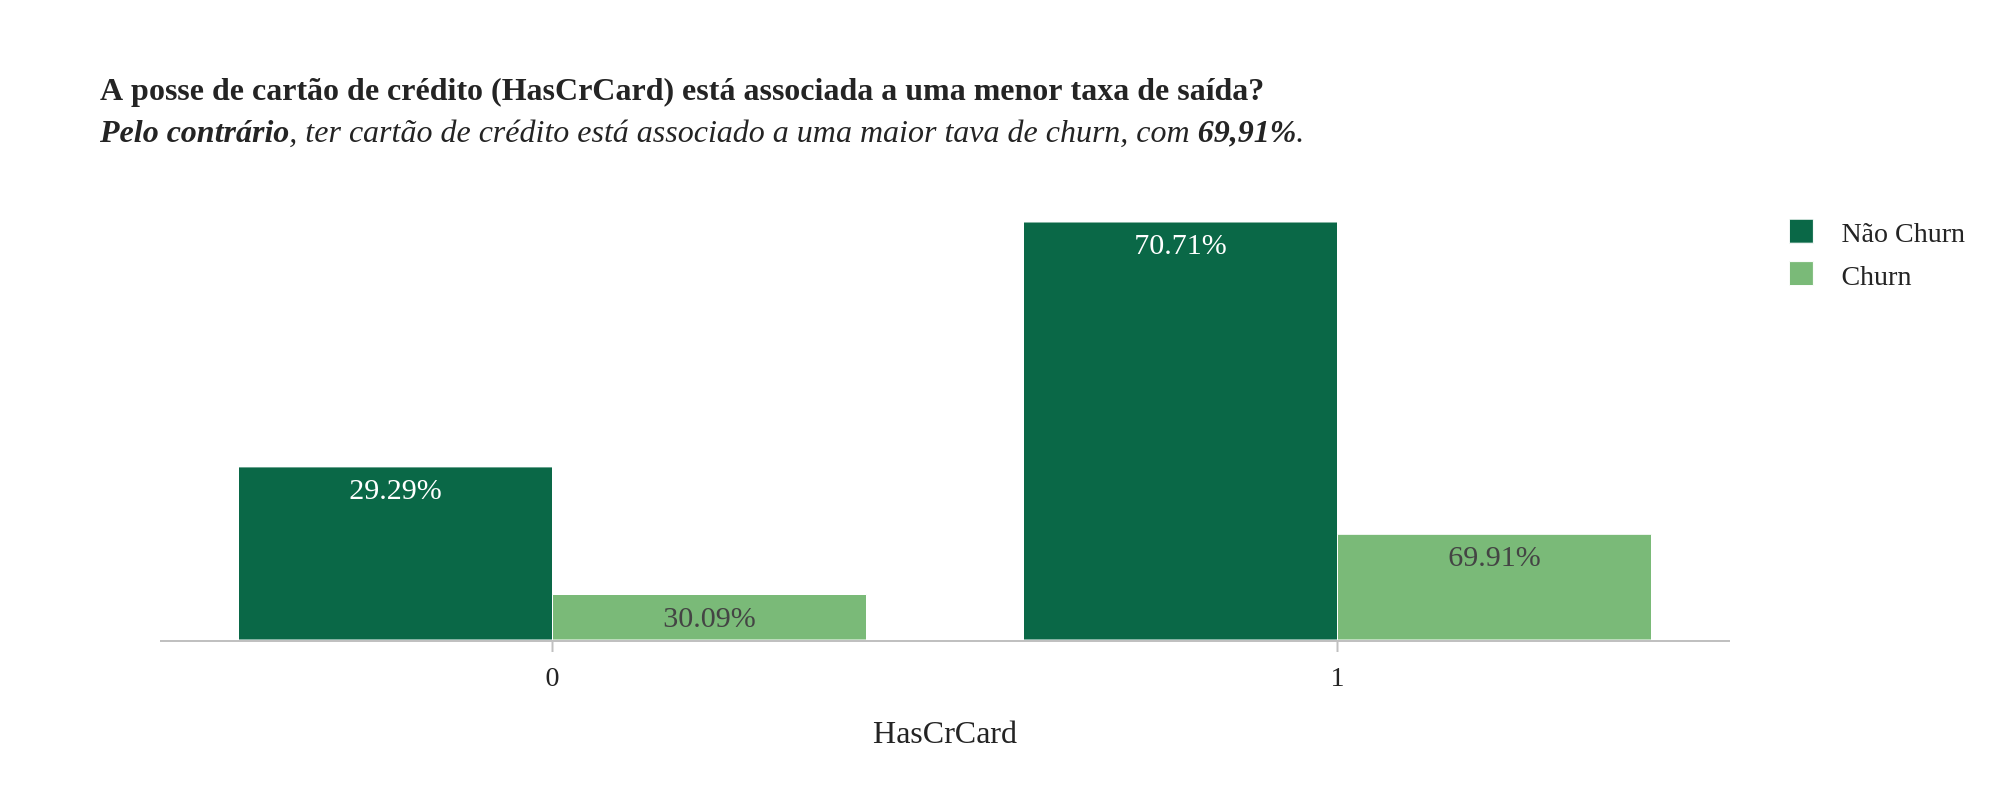

In [76]:
# dataframe contendo se o cliente tem ou nao cartao de credito
hascreditcard = categorical_variables['HasCrCard'].to_frame()

# juntando se o cliente tem ou nao cartao de credito com a response variable
hascreditcard_with_response_variable = hascreditcard.copy()
hascreditcard_with_response_variable['response_variable'] = response_variable

fig11 = go.Figure()
fig11.add_trace(go.Bar(x=hascreditcard_with_response_variable.groupby('response_variable')['HasCrCard'].value_counts()[0].index.sort_values(),
                       y=hascreditcard_with_response_variable.groupby('response_variable')['HasCrCard'].value_counts()[0].sort_index(),
                        marker_color='#0A6847',name='Não Churn',
                        text=[f'{num:.2f}%' for num in round(hascreditcard_with_response_variable.groupby('response_variable') \
                                                           ['HasCrCard'].value_counts(1)[0].sort_index()*100,2)],textfont_size=15))
fig11.add_trace(go.Bar(x=hascreditcard_with_response_variable.groupby('response_variable')['HasCrCard'].value_counts()[1].index.sort_values(),
                       y=hascreditcard_with_response_variable.groupby('response_variable')['HasCrCard'].value_counts()[1].sort_index(),
                       marker_color = '#7ABA78',name='Churn',
                       text=[f'{num:.2f}%' for num in round(hascreditcard_with_response_variable.groupby('response_variable') \
                                                           ['HasCrCard'].value_counts(1)[1].sort_index()*100,2)],textfont_size=15))
title = '<b>A posse de cartão de crédito (HasCrCard) está associada a uma menor taxa de saída?</b><br>' \
        '<i><b>Pelo contrário</b>, ter cartão de crédito está associado a uma maior tava de churn, com <b>69,91%</b>. </i>'
fig11.update_layout(title = dict(text=title,font_size=16),
                   width=1000,height =400,showlegend=True,template='simple_white',font_family='RockWell',legend_font_size=14)
fig11.update_yaxes(tickcolor='silver',linecolor='silver',showline=False,showticklabels=False,ticks='')
fig11.update_xaxes(title = dict(text='HasCrCard',font_size=16),
                  tickcolor='silver',linecolor='silver',tickfont_size=14)
fig11.show('png',scale=2, width=1000)

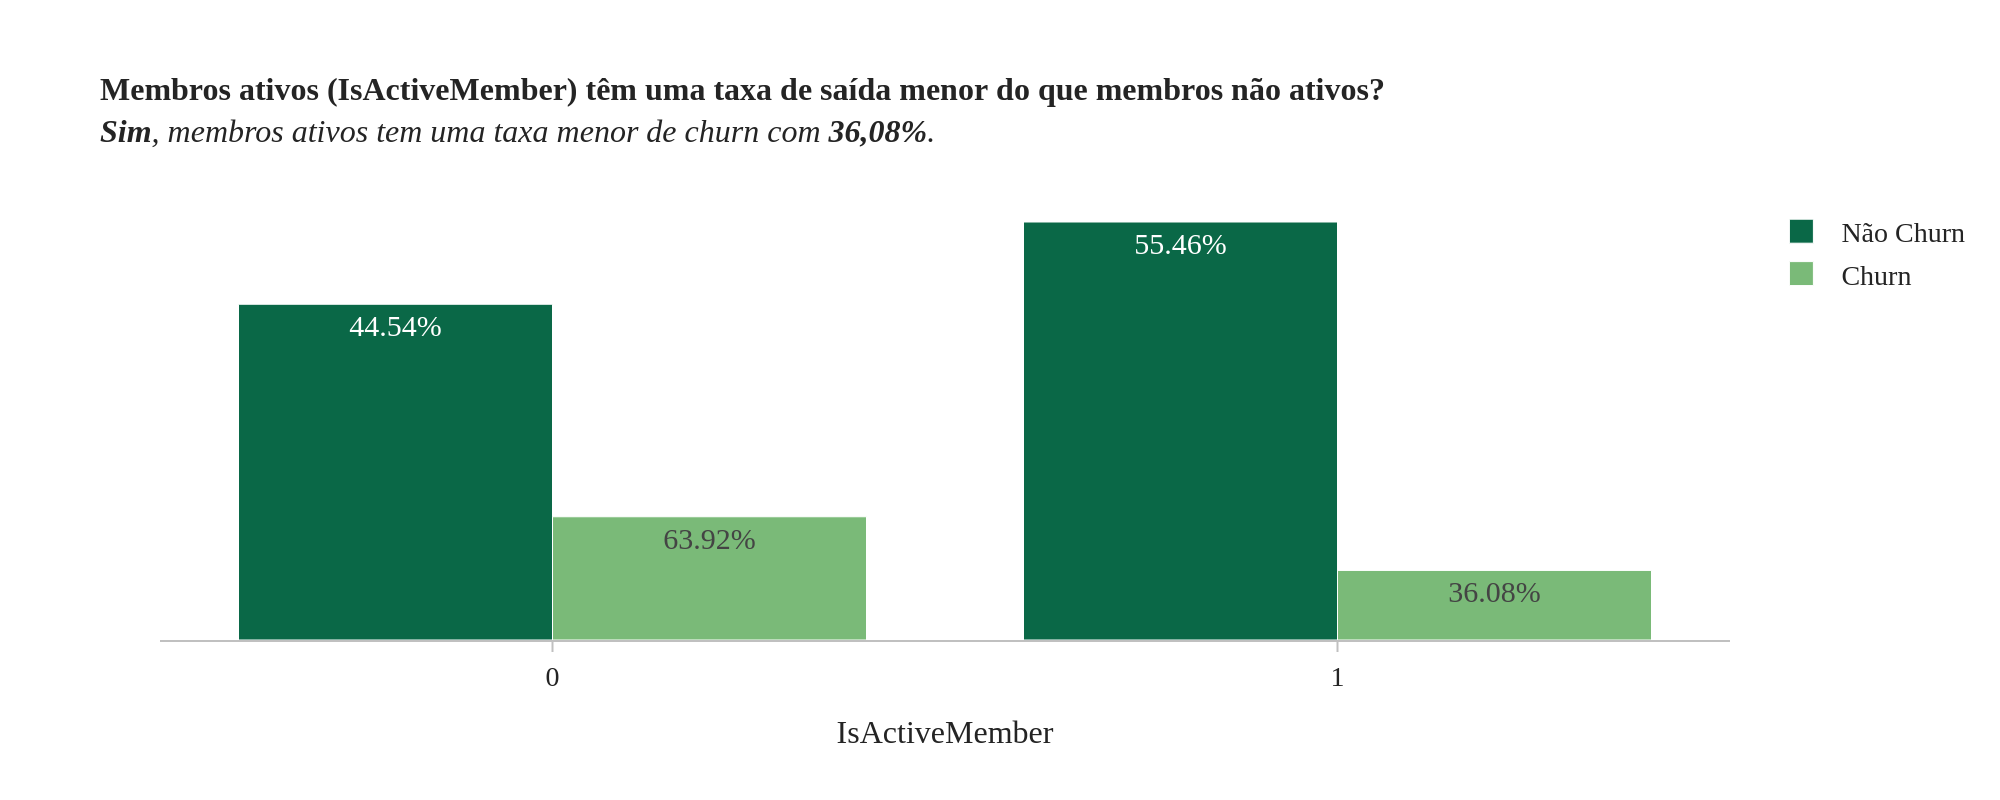

In [77]:
# dataframe contendo se o cliente tem ou nao cartao de credito
isactivemember = categorical_variables['IsActiveMember'].to_frame()

# juntando se o cliente tem ou nao cartao de credito com a response variable
isactivemember_with_response_variable = isactivemember.copy()
isactivemember_with_response_variable['response_variable'] = response_variable

fig12 = go.Figure()
fig12.add_trace(go.Bar(x=isactivemember_with_response_variable.groupby('response_variable')['IsActiveMember'].value_counts()[0].index.sort_values(),
                       y=isactivemember_with_response_variable.groupby('response_variable')['IsActiveMember'].value_counts()[0].sort_index(),
                        marker_color='#0A6847',name='Não Churn',
                        text=[f'{num:.2f}%' for num in round(isactivemember_with_response_variable.groupby('response_variable') \
                                                           ['IsActiveMember'].value_counts(1)[0].sort_index()*100,2)],textfont_size=15))
fig12.add_trace(go.Bar(x=isactivemember_with_response_variable.groupby('response_variable')['IsActiveMember'].value_counts()[1].index.sort_values(),
                       y=isactivemember_with_response_variable.groupby('response_variable')['IsActiveMember'].value_counts()[1].sort_index(),
                       marker_color = '#7ABA78',name='Churn',
                       text=[f'{num:.2f}%' for num in round(isactivemember_with_response_variable.groupby('response_variable') \
                                                           ['IsActiveMember'].value_counts(1)[1].sort_index()*100,2)],textfont_size=15))
title = '<b>Membros ativos (IsActiveMember) têm uma taxa de saída menor do que membros não ativos?</b><br>' \
        '<i><b>Sim</b>, membros ativos tem uma taxa menor de churn com <b>36,08%</b>.</i>'
fig12.update_layout(title = dict(text=title,font_size=16),
                   width=1000,height =400,showlegend=True,template='simple_white',font_family='RockWell',legend_font_size=14)
fig12.update_yaxes(tickcolor='silver',linecolor='silver',showline=False,showticklabels=False,ticks='')
fig12.update_xaxes(title = dict(text='IsActiveMember',font_size=16),
                  tickcolor='silver',linecolor='silver',tickfont_size=14)
fig12.show('png',scale=2, width=1000)

### 4. Como o tempo de permanência no banco (Tenure) afeta a probabilidade de saída?
- Clientes que estão no banco há mais tempo têm uma menor probabilidade de sair?
- Existe uma relação significativa entre o tempo de permanência e a taxa de saída?

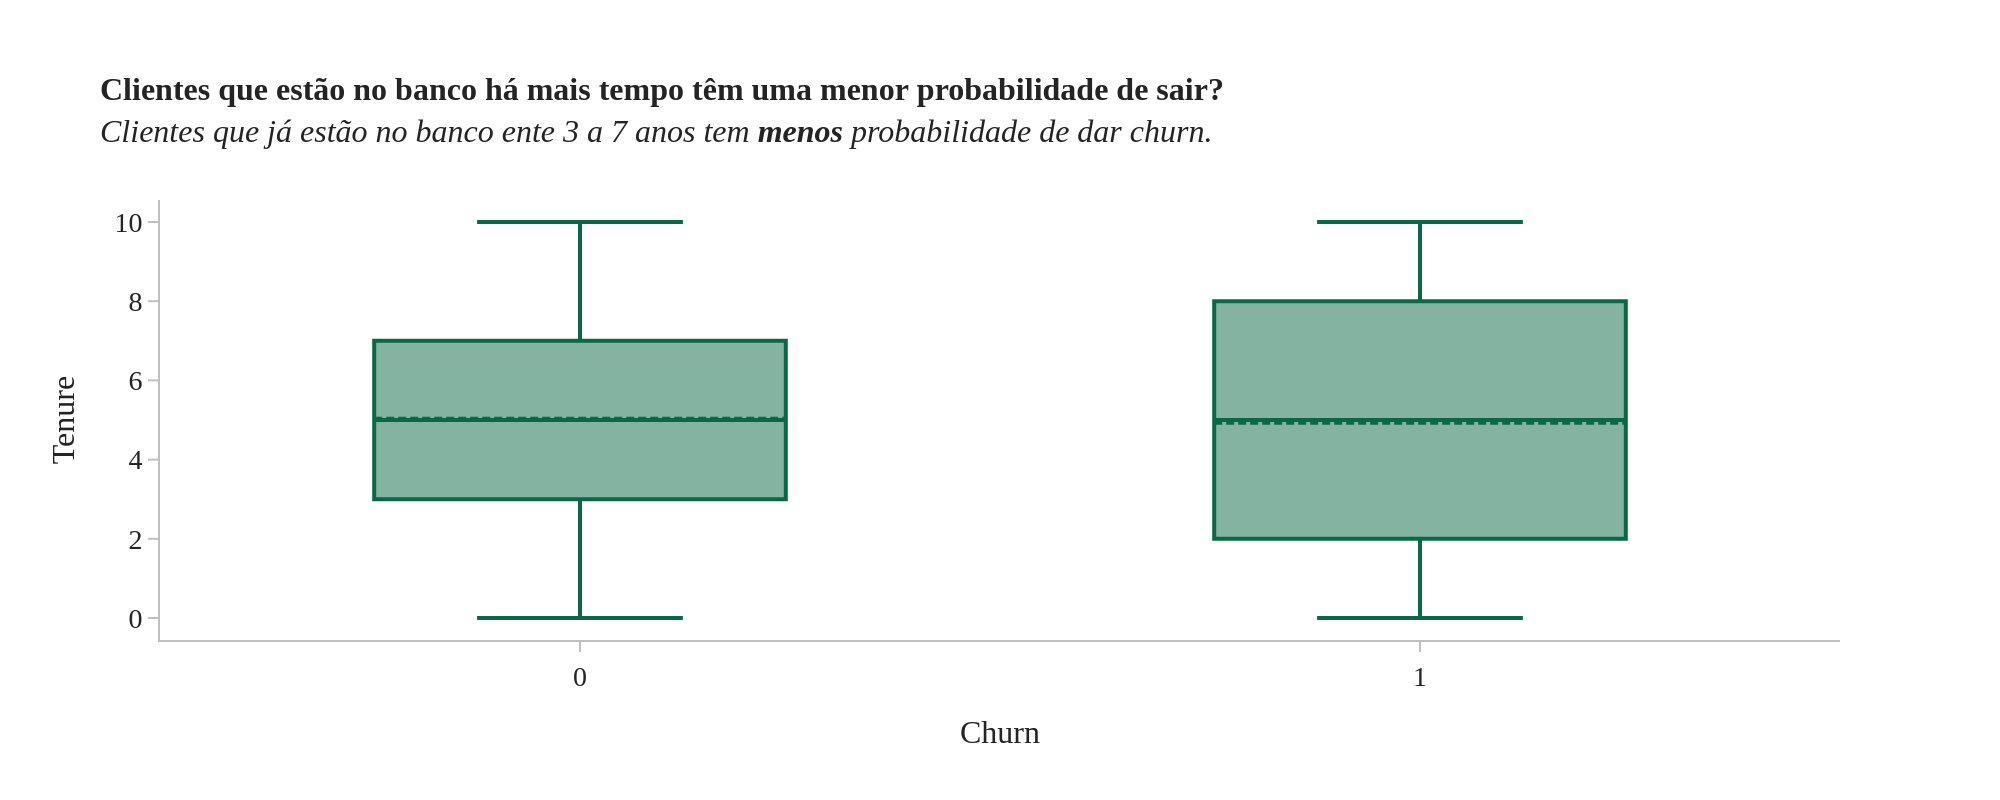

In [78]:
# dataframe contendo os anos que os clientes estão no banco
tenure  = numerical_variables['Tenure'].to_frame()

# juntando os anos que os clientes estão no banco com a response variable
tenure_with_response_variable = tenure.copy()
tenure_with_response_variable['response_variable'] = response_variable

fig13 = go.Figure()

fig13.add_trace(go.Box(x=tenure_with_response_variable['response_variable'],y=tenure_with_response_variable['Tenure'],
                       marker_color='#0A6847',boxmean=True))

title = '<b>Clientes que estão no banco há mais tempo têm uma menor probabilidade de sair?</b><br>' \
        '<i>Clientes que já estão no banco ente 3 a 7 anos tem <b>menos</b> probabilidade de dar churn.</i>'
fig13.update_layout(title = dict(text=title,font_size=16),
                   width=1000,height =400,showlegend=False,template='simple_white',font_family='RockWell',legend_font_size=14)
fig13.update_yaxes(title = dict(text='Tenure',font_size=16),tickcolor='silver',linecolor='silver',tickfont_size=14)
fig13.update_xaxes(title = dict(text='Churn',font_size=16),
                  tickcolor='silver',linecolor='silver',tickfont_size=14)
fig13.show('png',scale=2, width=1000)

Existe uma relação significativa entre o tempo de permanência e a taxa de saída?
- Não esxiste uma relação muito significativa, mais clientes que estão entre 2 anos ou menos ou 8 anos ou mais, tem mais probabilidade de dar churn.

## Conclusão
- O objetivo dessa análise exploratória era verificar o dataset em si, verificando como as variáveis se relacionavam com a response variable.
- Principais insights obtidos:
    - Clientes na faixa etária de <b>40-50</b> tem a maior taxa de saída do banco com <b>39,57%</b>, seguido da faixa 30-40 e 50-60 praticamente empatados.
    - Mulheres tendem a dar mais churn do que os homens.
    - Clientes <b>franceses</b> tendem a ficar mais no banco com <b>52,79%</b> de não churn. Clientes <b>alemãos</b> tendem a dar menos churn com <b>20,27%</b> de taxa.
    - Clientes que tem a pontuação entre <b>550-650</b> e <b>650-750</b> tem mais probabilidade de dar churn, com <b>33,78%</b> e <b>32,74%</b> de taxa, respectivamente.
    - Não há uma <b>correlação</b> entre o saldo da conta e a probabilidade de churn. 
    - O salário estimado <b>não</b> é um <b>fator</b> importante na probabilidade de churn do cliente.
    - Clientes que tinham 4 produtos <b>todos</b> deram churn, os que tinham 3 produtos a grande maioria deu churn também, seguido dos que tinham 1 produto.
    - Ter cartão de crédito está associado a uma maior tava de churn, com <b>69,91%</b>. 
    - Membros ativos tem uma taxa menor de churn com <b>36,08%</b>.
    - Clientes que já estão no banco ente 3 a 7 anos tem <b>menos</b> probabilidade de dar churn.
    - Clientes que estão entre 2 anos ou menos ou 8 anos ou mais, tem mais probabilidade de dar churn.